<a href="https://colab.research.google.com/github/Suhyun77/3D-Virtual-Try-On/blob/main/3D_Virtual_Try_On.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3D Virtual Try On**

Install Requirements

In [ ]:
!pip install simple_colors

In [12]:
# Google Drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# directory move
%cd drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/
!pwd

/content/drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On
/content/drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On


In [2]:
# install Requirements
!pip install torch==1.6.0 torchvision==0.7.0

     |████████████████████████████████| 748.8 MB 18 kB/s 
     |████████████████████████████████| 5.9 MB 17.2 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.6.0 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.6.0 which is incompatible.


In [ ]:
# GPU 
import torch

# gpu 연산이 가능하면 'cuda:0', 아니면 'cpu' 출력
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## **00.Overview**

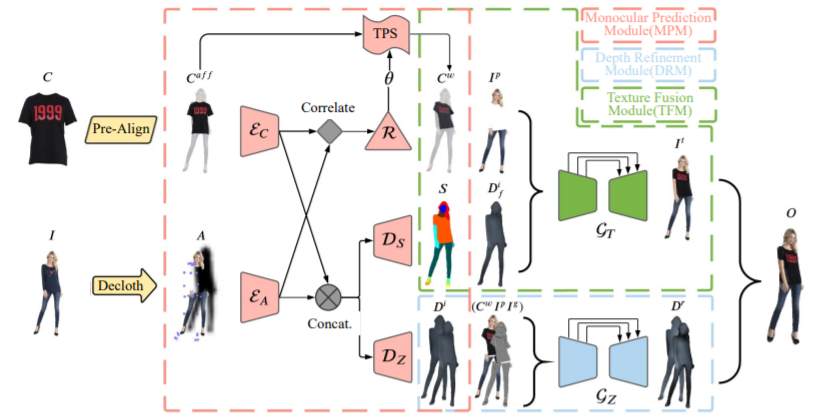

from [ICCV2021 paper "M3D-VTON: A Monocular-to-3D Virtual Try-on Network"](https://openaccess.thecvf.com/content/ICCV2021/papers/Zhao_M3D-VTON_A_Monocular-to-3D_Virtual_Try-On_Network_ICCV_2021_paper.pdf)

## **01. Custom Data**

### 1) input 이미지 해상도 조절

['h_m_blouse-removebg-preview.png', 'h_m_tutleneck-removebg-preview.png', 'h_m_sweater-removebg-preview.png', 'h_m_fur-removebg-preview.png', 'h_m_knit-removebg-preview.png']


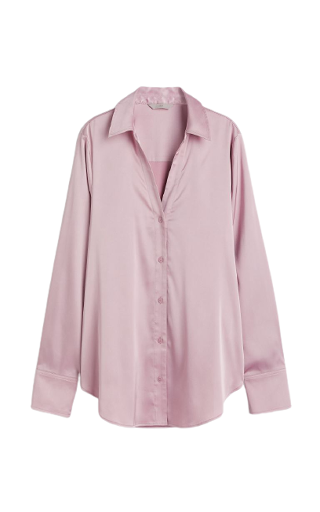

size : (512, 320, 3)


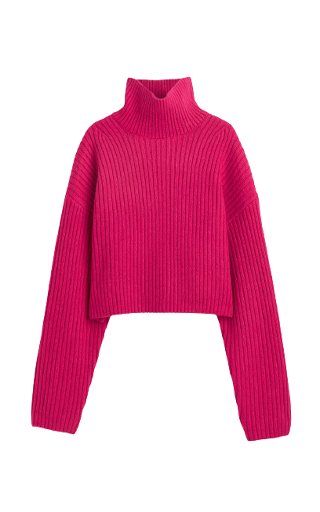

size : (512, 320, 3)


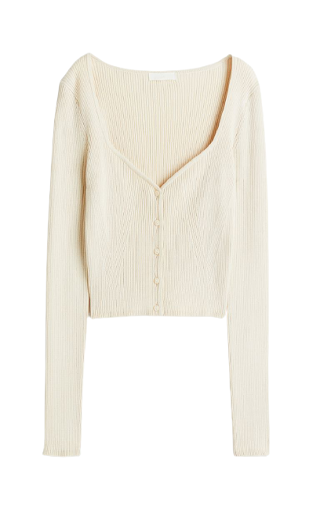

size : (512, 320, 3)


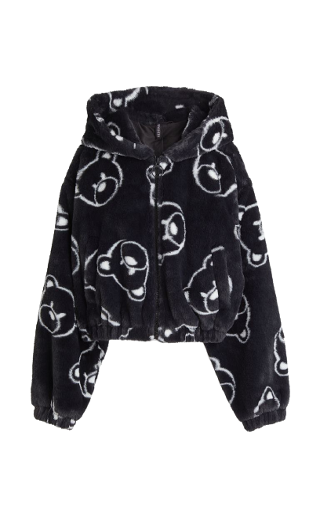

size : (512, 320, 3)


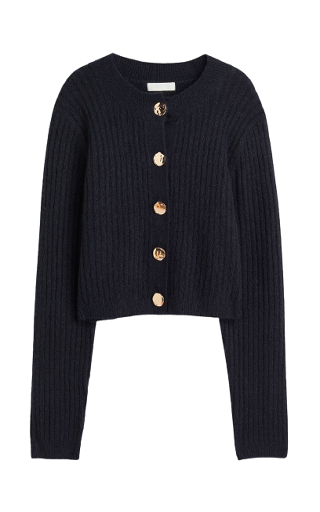

size : (512, 320, 3)


In [ ]:
# 이미지 : 320*512 해상도 만들기
"""

의상 이미지 경로 : mpv3d_example/cloth/
정면 모델 이미지 경로 : mpv3d_example/image/

----------------------------------------------------------------------------------------

cv2.imread(fileName, flag) : 이미지 파일을 flag값에 따라서 읽어들입니다.

- fileName : 이미지파일의 경로 (str)
- flag : 이미지 파일을 읽을 때의 Option (int)
    - cv2.IMREAD_COLOR / 1 : 이미지 파일을 Color로 읽음
    - cv2.IMREAD_GRAYSCALE / 0 : 이미지를 Grayscale로 읽음
    - cv2.IMREAD_UNCHANGED / -1 : 이미지파일을 alpha channel까지 포함하여 읽음
- return : 이미지 3차원 행렬 (numpy.ndarray)
    - e.g. (206, 207, 3) -> Y축, X축, BGR값(openCV는 B(lue), G(reen), R(ed)로 표현)

----------------------------------------------------------------------------------------

cv2.resize(src, dsize, dst=None, fx=None, fy=None, interpolation=None) -> dst

• src: 입력 영상
• dsize: 결과 영상 크기. (w, h) 튜플. (0, 0)이면 fx와 fy 값을 이용하여 결정.
• dst: 출력 영상
• fx, fy: x와 y방향 스케일 비율(scale factor). (dsize 값이 0일 때 유효)
• interpolation: 보간법 지정. 기본값은 cv2.INTER_LINEAR
    - cv2.INTER_NEAREST - 최근방 이웃 보간법
    - cv2.INTER_LINEAR - 양선형 보간법(2x2 이웃 픽셀 참조), 가장 많이 쓰는 방법
    - cv2.INTER_CUBIC - 3차회선 보간법(4x4 이웃 픽셀 참조)
    - cv2.INTER_LANCZOS4 - Lanczos 보간법 (8x8 이웃 픽셀 참조)
    - cv2.INTER_AREA - 영상 축소시 효과적
"""

import cv2
import os
from google.colab.patches import cv2_imshow

# cloth 이미지 resize & save
path = "./mpv3d_example/cloth/"  # pwd 확인 필수
cloth_list = [i for i in os.listdir(path) if i.startswith('h&m_')]
print(cloth_list)

for filename in cloth_list:
    img = cv2.imread(path+filename)
    resize_img = cv2.resize(img, dsize=(320, 512), interpolation=cv2.INTER_CUBIC)  # resize
    cv2.imwrite(path+filename, resize_img)  # save
    cv2_imshow(resize_img)   # display
    print(f'size : {resize_img.shape}')  # size

['model5-removebg-preview.png', 'model3-removebg-preview.png', 'model-removebg-preview.png', 'model2-removebg-preview.png', 'model4-removebg-preview.png', 'model6-removebg-preview.png']


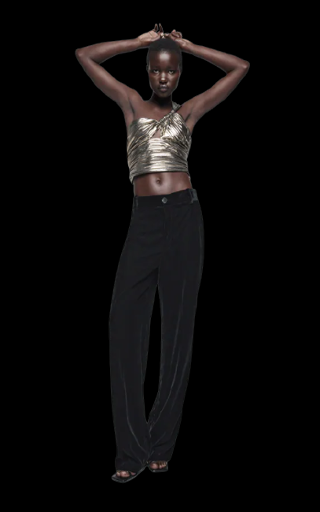

(512, 320, 3)


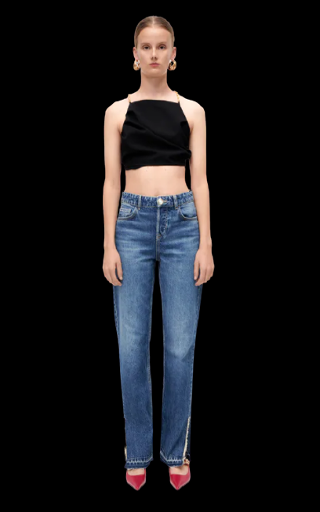

(512, 320, 3)


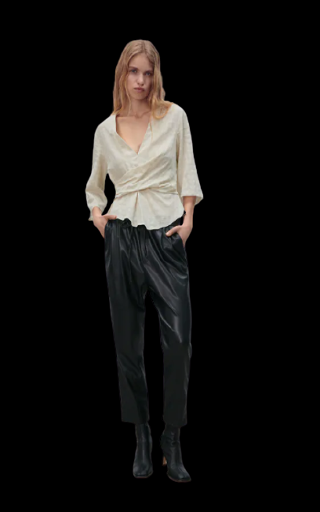

(512, 320, 3)


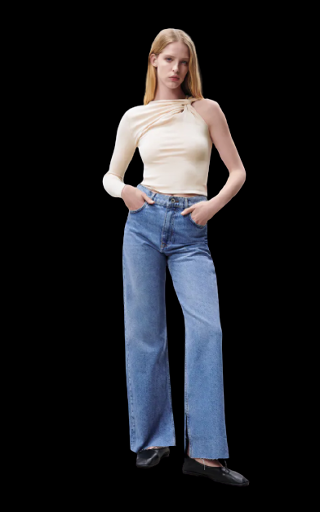

(512, 320, 3)


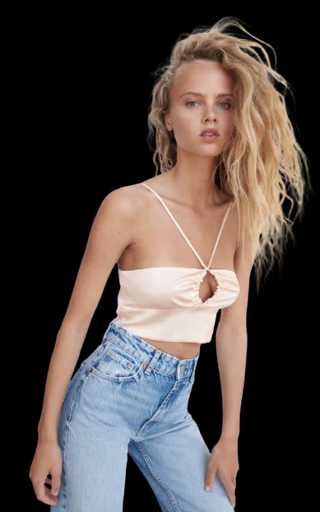

(512, 320, 3)


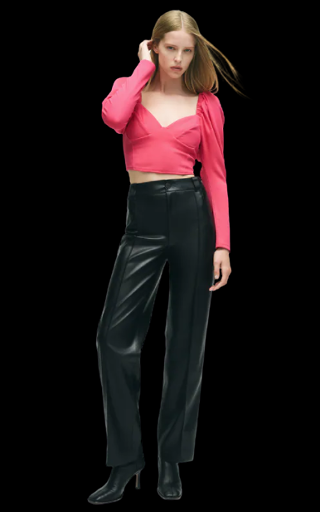

(512, 320, 3)


In [ ]:
# image dir의 model 이미지 resize
path = "./mpv3d_example/image/"
model_list = [i for i in os.listdir(path) if i.startswith('model')]
print(model_list)

for filename in model_list:
    img = cv2.imread(path+filename)
    resize_img = cv2.resize(img, dsize=(320, 512), interpolation=cv2.INTER_CUBIC)  # resize
    cv2.imwrite(path+filename, resize_img)  # save
    cv2_imshow(resize_img)   # display
    print(resize_img.shape)  # size

### 2) cloth-mask 생성

#### **[remove.bg](https://www.remove.bg/ko)와 포토샵을 활용하여 cloth-mask 생성**

['h_m_blouse-removebg-preview.png', 'h_m_fur-removebg-preview.png', 'h_m_knit-removebg-preview.png', 'h_m_sweater-removebg-preview.png', 'h_m_tutleneck-removebg-preview.png']


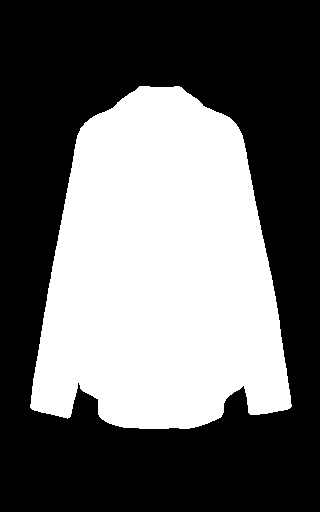

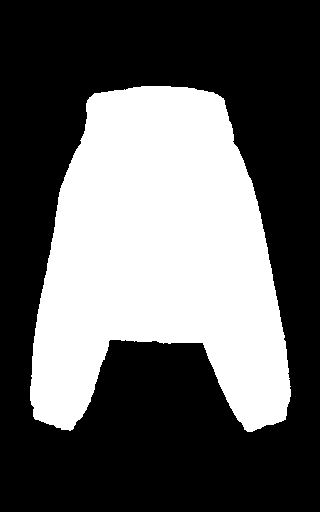

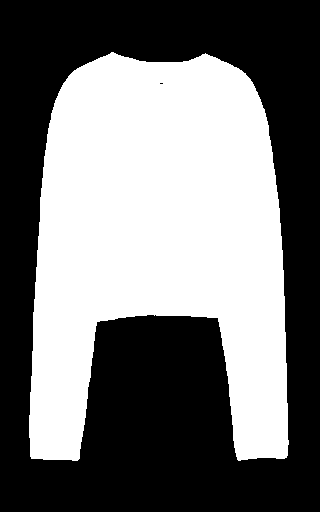

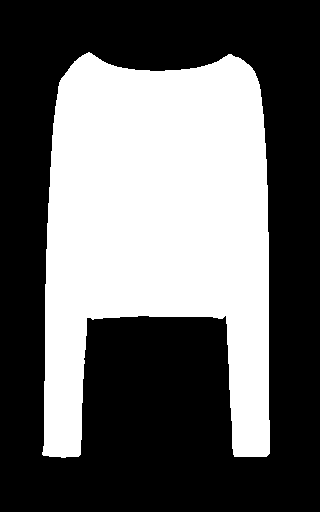

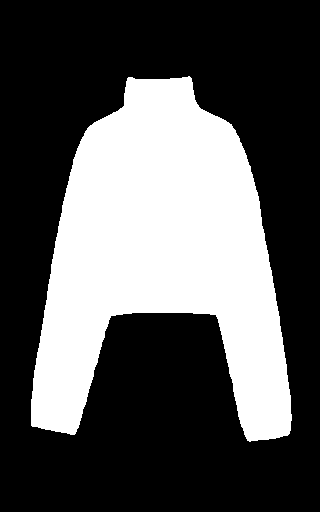

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

path = "./mpv3d_example/cloth-mask/"
model_list = [i for i in os.listdir(path) if i.startswith('h_m_')]
print(model_list)

for filename in model_list:
    image = cv2.imread(path+filename)
    cv2_imshow(image)

#### **임계값 조절 - 영상의 이진화(Binarization)**

- 영상의 픽셀 값을 0 또는 255(1)로 만드는 연산
- 목적
  - 배경과 객체 구분
  - 관심 영역과 비관심 영역 구분
</br>

>**그레이스케일 영상의 이진화**
- 픽셀 값 > 임계값 : 0(검은색)
- 픽셀 값 < 임계값 : 255(흰색)</br>   
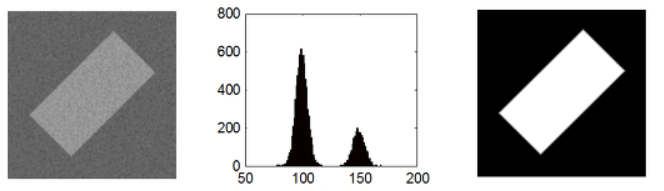




In [ ]:
!pip install termcolor

['h_m_blouse-removebg-preview.png', 'h_m_tutleneck-removebg-preview.png', 'h_m_sweater-removebg-preview.png', 'h_m_fur-removebg-preview.png', 'h_m_knit-removebg-preview.png']


h_m_blouse-removebg-preview.png


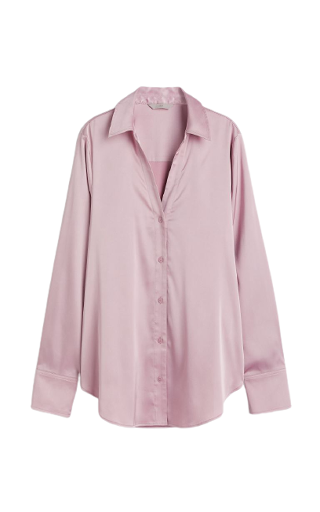

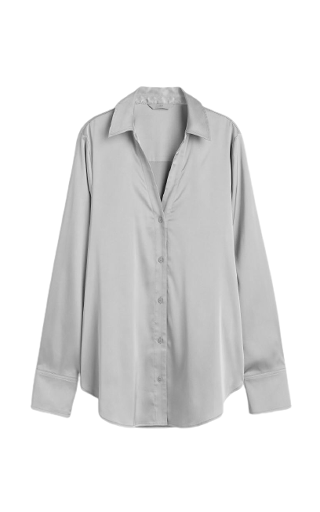

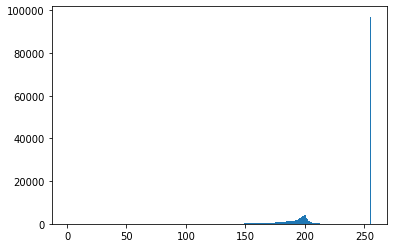



h_m_tutleneck-removebg-preview.png


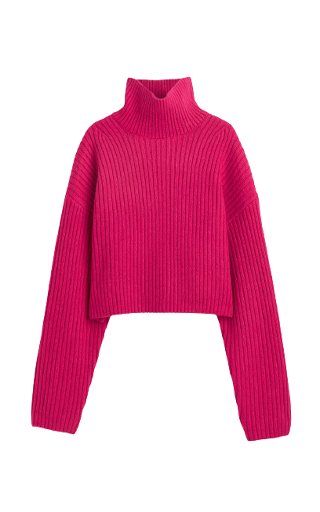

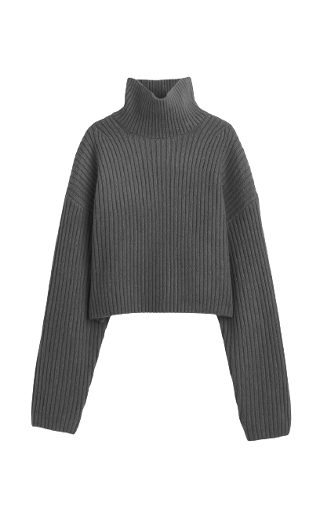

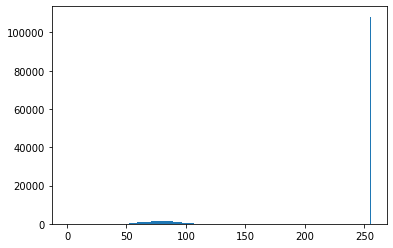



h_m_sweater-removebg-preview.png


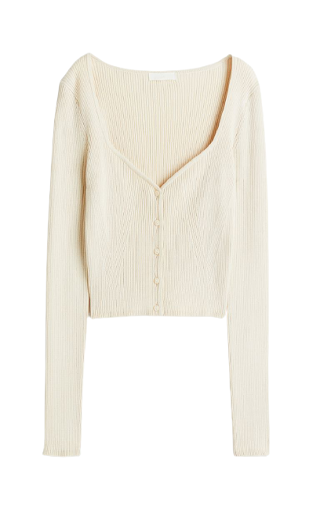

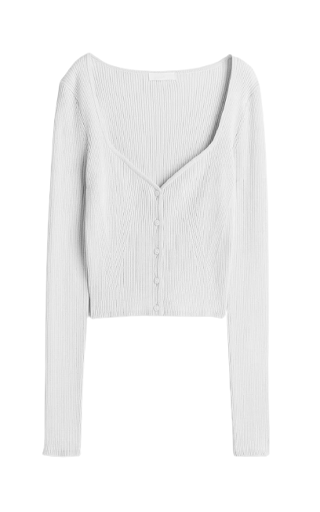

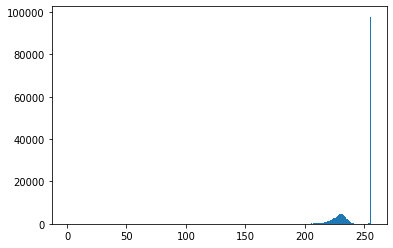



h_m_fur-removebg-preview.png


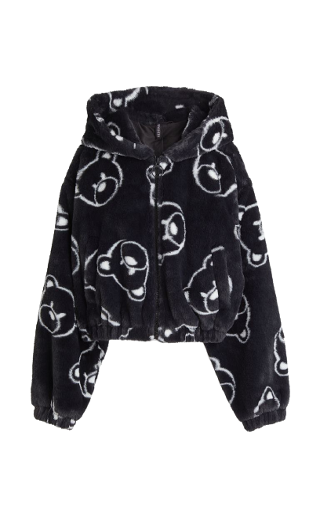

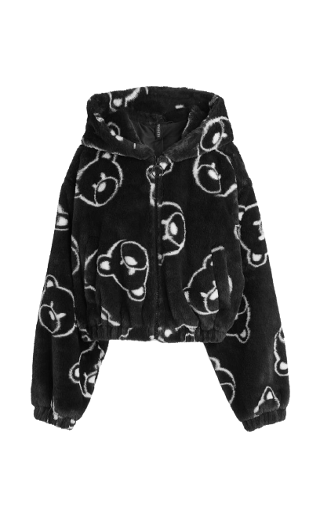

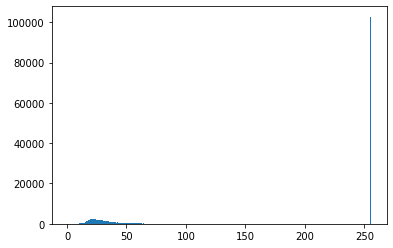



h_m_knit-removebg-preview.png


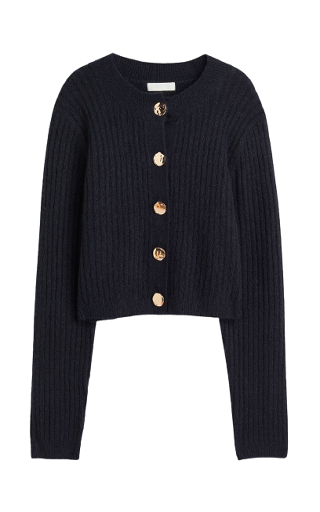

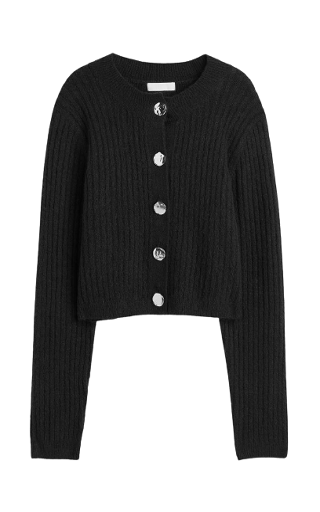

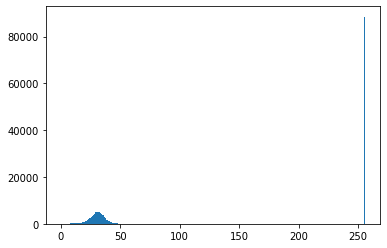

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import sys, os
from termcolor import colored

path = "./mpv3d_example/cloth/"
model_list = [i for i in os.listdir(path) if i.startswith('h&m_')]
print(model_list)

for i in range(len(model_list)):
    img = cv2.imread(path+model_list[i]) 
    print(colored('\n\n'+model_list[i], 'blue', attrs=['bold']))
    cv2_imshow(img) 

    # grayscale 이미지
    gray_img = cv2.imread(path+model_list[i], 0) 
    cv2_imshow(gray_img) 

    # histogram
    hist = cv2.calcHist([gray_img],[0],None,[256],[0,256]) # calcHist : 히스토그램 정보를 얻는 함수
    plt.hist(gray_img.ravel(), 256, [0,256])
    plt.show()

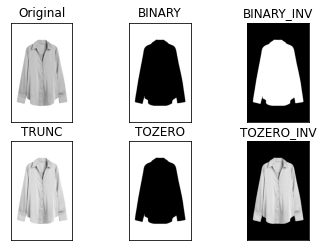

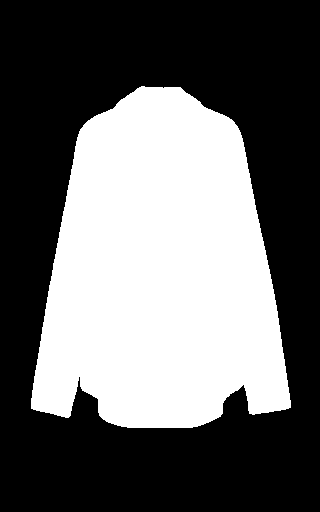

In [ ]:
# 임계값 함수 - cv2.threshold
"""
cv2.threshold(src, thresh, maxval, type, dst=None) -> retval, dst

• src: 입력 영상. 다채널, 8비트 또는 32비트 실수형
• thresh: 사용자 지정 임계값
• maxval: cv2.THRESH_BINARY 또는 cv2.THRESH_BINARY_INV 방법 사용 시  임계값을 넘었을 때 적용할 value. 보통 255(흰색)로 지정.
• type: cv2.THRESH_ 로 시작하는 플래그. 임계값 함수 동작 지정 또는 자동 임계값 결정 방법 지정
• retval: 사용된 임계값
• dst: 출력 영상. src와 동일 크기, 동일 타입, 같은 채널 수
"""

img = cv2.imread(path+'h&m_blouse_front.png', 0) 

ret, dst1 = cv2.threshold(img,230,255, cv2.THRESH_BINARY)
ret, dst2 = cv2.threshold(img,230,255, cv2.THRESH_BINARY_INV) # -> mask
ret, dst3 = cv2.threshold(img,230,255, cv2.THRESH_TRUNC)
ret, dst4 = cv2.threshold(img,230,255, cv2.THRESH_TOZERO)
ret, dst5 = cv2.threshold(img,230,255, cv2.THRESH_TOZERO_INV)

titles =['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img,dst1,dst2,dst3,dst4,dst5]

for i in range(6):
	plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
	plt.title(titles[i])
	plt.xticks([]),plt.yticks([])

plt.show()
cv2_imshow(dst2)

['h_m_blouse-removebg-preview.png', 'h_m_tutleneck-removebg-preview.png', 'h_m_sweater-removebg-preview.png', 'h_m_fur-removebg-preview.png', 'h_m_knit-removebg-preview.png']


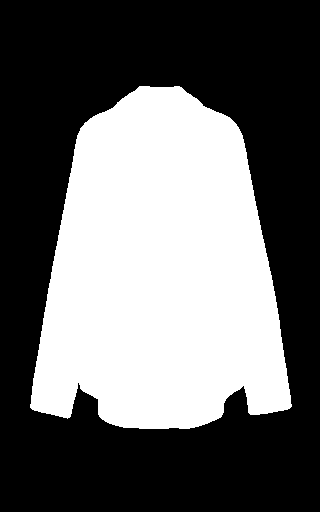

(512, 320)


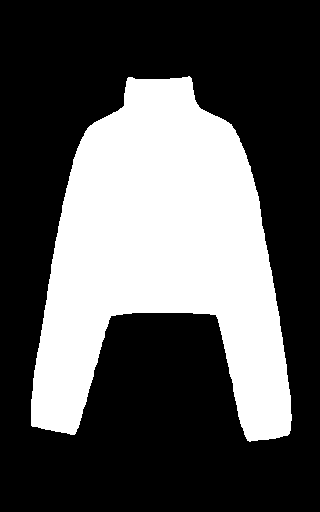

(512, 320)


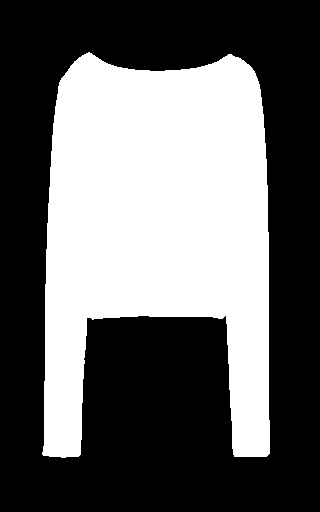

(512, 320)


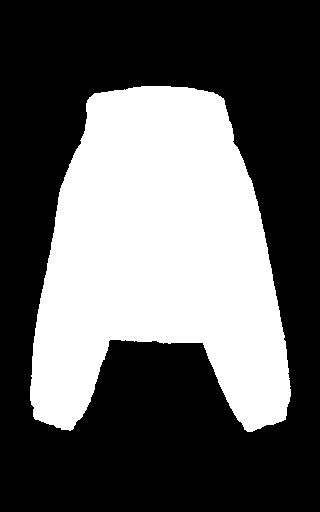

(512, 320)


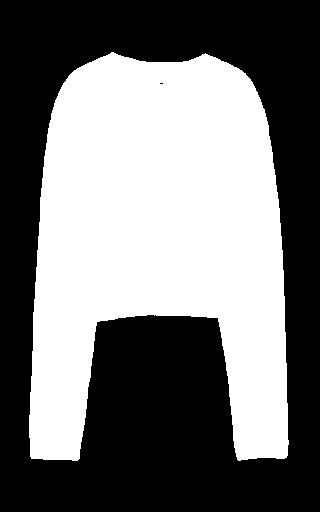

(512, 320)


In [ ]:
# cloth-mask create & save
path = "./mpv3d_example/cloth/"
cloth_list = [i for i in os.listdir(path) if i.startswith('h_m_')]
print(cloth_list)

for i in range(len(cloth_list)):
    img = cv2.imread(path+cloth_list[i], 0) # grayscale image
    ret, dst = cv2.threshold(img, 250, 255, cv2.THRESH_BINARY_INV)
    cv2.imwrite("./mpv3d_example/cloth-mask/"+cloth_list[i], dst)  # save
    cv2_imshow(dst)   # display
    print(dst.shape)  # size

### 3) Human Parsing : Self-Correction-Human-Parsing

https://github.com/PeikeLi/Self-Correction-Human-Parsing

In [ ]:
!pip install ninja

     |████████████████████████████████| 108 kB 4.1 MB/s 


In [ ]:
!git clone https://github.com/PeikeLi/Self-Correction-Human-Parsing
%cd Self-Correction-Human-Parsing
!mkdir checkpoints  # pre-trained model
!mkdir inputs  # 입력 이미지
!mkdir outputs  # 결과물

Cloning into 'Self-Correction-Human-Parsing'...
remote: Enumerating objects: 719, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 719 (delta 3), reused 8 (delta 3), pack-reused 708
Receiving objects: 100% (719/719), 3.80 MiB | 12.58 MiB/s, done.
Resolving deltas: 100% (145/145), done.
Checking out files: 100% (545/545), done.
/content/drive/My Drive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/Self-Correction-Human-Parsing


In [ ]:
# 데이터셋 선택
dataset = 'atr'         #select from ['lip', 'atr', 'pascal']

In [ ]:
%cd ..
%cd Self-Correction-Human-Parsing

/content/drive/My Drive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On
/content/drive/My Drive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/Self-Correction-Human-Parsing


In [ ]:
import gdown

if dataset == 'lip':
    url = 'https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH'
elif dataset == 'atr':
    url = 'https://drive.google.com/uc?id=1ruJg4lqR_jgQPj-9K0PP-L2vJERYOxLP'
elif dataset == 'pascal':
    url = 'https://drive.google.com/uc?id=1E5YwNKW2VOEayK9mWCS3Kpsxf-3z04ZE'

output = 'checkpoints/final.pth'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ruJg4lqR_jgQPj-9K0PP-L2vJERYOxLP
To: /content/drive/My Drive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/Self-Correction-Human-Parsing/checkpoints/final.pth
100%|██████████| 267M/267M [00:02<00:00, 94.8MB/s]


'checkpoints/final.pth'

In [ ]:
# 업로드할 이미지 'inputs' 파일에 넣기
# %cd inputs
# from google.colab import files
# uploaded = files.upload()
# %cd ..

/content/Self-Correction-Human-Parsing/inputs


Saving model2.PNG to model2 (1).PNG
/content/Self-Correction-Human-Parsing


In [ ]:
!python3 simple_extractor.py --dataset 'atr' --model-restore 'checkpoints/final.pth' --input-dir 'inputs' --output-dir 'outputs'

Evaluating total class number 18 with ['Background', 'Hat', 'Hair', 'Sunglasses', 'Upper-clothes', 'Skirt', 'Pants', 'Dress', 'Belt', 'Left-shoe', 'Right-shoe', 'Face', 'Left-leg', 'Right-leg', 'Left-arm', 'Right-arm', 'Bag', 'Scarf']
100% 6/6 [00:07<00:00,  1.30s/it]


### 4) OpenPose 

[reference]
- https://hanryang1125.tistory.com/2
- https://m.blog.naver.com/rhrkdfus/221531159811
- https://www.learnopencv.com/deep-learning-based-human-pose-estimation-using-opencv-cpp-python/


In [26]:
import cv2
import os
from google.colab.patches import cv2_imshow

# 입력받은 frame에 BODY_PARTS를 참고하여 노란색 점을 포인팅하는 함수
def output_keypoints(frame, proto_file, weights_file, threshold, model_name, BODY_PARTS):
    global points

    # path에 있는 network 불러오기
    net = cv2.dnn.readNetFromCaffe(proto_file, weights_file)

    # 입력 이미지의 사이즈 정의
    image_height = 368
    image_width = 368

    # network에 넣기 위한 전처리
    """
    blobFromImage()
    Net에 입력되는 데이터는 blob 형식으로 변경 해줘야 한다.
    blob: opencv에서 Mat타입의 4차원(4D Tensor: NCHW) 행렬
    N: 영상 개수
    C: 채널 개수
    H: 영상 세로
    W: 영상 가로
    """
    input_blob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (image_width, image_height), (0, 0, 0), swapRB=False, crop=False)

    # 전처리된 이미지(input_blob)를 network에 입력
    net.setInput(input_blob)

    # 결과 받아오기
    out = net.forward()
    # The output is a 4D matrix :
    # The first dimension being the image ID ( in case you pass more than one image to the network ).
    # The second dimension indicates the index of a keypoint.
    # The model produces Confidence Maps and Part Affinity maps which are all concatenated.
    # For COCO model it consists of 57 parts – 18 keypoint confidence Maps + 1 background + 19*2 Part Affinity Maps. Similarly, for MPI, it produces 44 points.
    # We will be using only the first few points which correspond to Keypoints.
    # The third dimension is the height of the output map.

    # output.shape[0] = 이미지 ID, [2] = 출력 맵의 높이, [3] = 너비
    out_height = out.shape[2]
    # The fourth dimension is the width of the output map.
    out_width = out.shape[3]

    # 원본 이미지의 높이, 너비를 받아오기
    frame_height, frame_width = frame.shape[:2]

    # 포인트 리스트 초기화
    points = []
    pose_keypoints_2d = []

    print(f"\n============================== {model_name} Model ==============================")
    for i in range(len(BODY_PARTS)):

        # 신체 부위의 confidence map
        prob_map = out[0, i, :, :]

        # 최소값, 최대값, 최소값 위치, 최대값 위치
        min_val, prob, min_loc, point = cv2.minMaxLoc(prob_map)

        # 원본 이미지에 맞게 포인트 위치 조정
        x = (frame_width * point[0]) / out_width
        x = int(x)
        
        y = (frame_height * point[1]) / out_height
        y = int(y)
        

        
        # 키포인트 검출한 결과가 threshold보다 크면(검출한 곳이 위 BODY_PARTS랑 맞는 부위면) points에 추가
        if prob > threshold:  # [pointed]
            cv2.circle(frame, (x, y), 5, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
            cv2.putText(frame, str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1, lineType=cv2.LINE_AA)

            points.append((x, y))
            print(f"[pointed] {BODY_PARTS[i]} ({i}) => prob: {prob:.5f} / x: {x} / y: {y}")
            pose_keypoints_2d.append(x)
            pose_keypoints_2d.append(y)
            pose_keypoints_2d.append(prob)

        else:  # [not pointed]
            cv2.circle(frame, (x, y), 5, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
            cv2.putText(frame, str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 1, lineType=cv2.LINE_AA)

            points.append(None)
            print(f"[not pointed] {BODY_PARTS[i]} ({i}) => prob: {prob:.5f} / x: {x} / y: {y}")
    print(f'JSON - pose_keypoints_2d : {pose_keypoints_2d}')
    cv2_imshow(frame)
    return frame

In [11]:
# 입력받은 frame에 POSE_PAIRS를 참고하여 노란색 점을 초록색 선으로 잇는 함수
def output_keypoints_with_lines(frame, POSE_PAIRS):
    print()
    for pair in POSE_PAIRS:
        part_a = pair[0]  # 0 (Head)
        part_b = pair[1]  # 1 (Neck)
        if points[part_a] and points[part_b]:
            print(f"[linked] {part_a} {points[part_a]} <=> {part_b} {points[part_b]}")
            cv2.line(frame, points[part_a], points[part_b], (0, 255, 0), 3)
        else:
            print(f"[not linked] {part_a} {points[part_a]} <=> {part_b} {points[part_b]}")

    cv2_imshow(frame)

In [ ]:
!pwd

/content




------------------------- Image : model5.PNG -------------------------

============================== MPII Model ==============================
[pointed] Head (0) => prob: 0.72023 / x: 160 / y: 33
[pointed] Neck (1) => prob: 0.82905 / x: 160 / y: 100
[pointed] RShoulder (2) => prob: 0.67403 / x: 125 / y: 100
[pointed] RElbow (3) => prob: 0.77537 / x: 76 / y: 44
[pointed] RWrist (4) => prob: 0.13383 / x: 125 / y: 33
[pointed] LShoulder (5) => prob: 0.67244 / x: 187 / y: 111
[pointed] LElbow (6) => prob: 0.67765 / x: 236 / y: 66
[pointed] LWrist (7) => prob: 0.54796 / x: 180 / y: 44
[pointed] RHip (8) => prob: 0.62947 / x: 139 / y: 222
[pointed] RKnee (9) => prob: 0.47959 / x: 118 / y: 322
[pointed] RAnkle (10) => prob: 0.46098 / x: 125 / y: 445
[pointed] LHip (11) => prob: 0.60871 / x: 180 / y: 222
[pointed] LKnee (12) => prob: 0.36705 / x: 173 / y: 345
[pointed] LAnkle (13) => prob: 0.35426 / x: 153 / y: 445
[pointed] Chest (14) => prob: 0.76521 / x: 160 / y: 166
[pointed] Backgroun

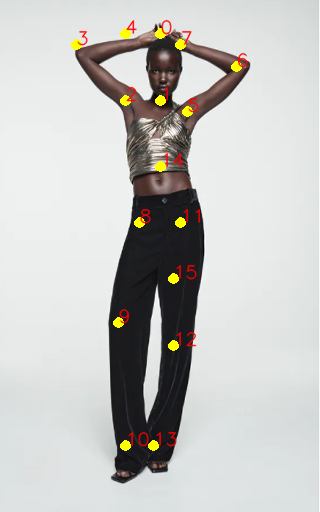


[linked] 0 (160, 33) <=> 1 (160, 100)
[linked] 1 (160, 100) <=> 2 (125, 100)
[linked] 1 (160, 100) <=> 5 (187, 111)
[linked] 1 (160, 100) <=> 14 (160, 166)
[linked] 2 (125, 100) <=> 3 (76, 44)
[linked] 3 (76, 44) <=> 4 (125, 33)
[linked] 5 (187, 111) <=> 6 (236, 66)
[linked] 6 (236, 66) <=> 7 (180, 44)
[linked] 8 (139, 222) <=> 9 (118, 322)
[linked] 9 (118, 322) <=> 10 (125, 445)
[linked] 11 (180, 222) <=> 12 (173, 345)
[linked] 12 (173, 345) <=> 13 (153, 445)
[linked] 14 (160, 166) <=> 8 (139, 222)
[linked] 14 (160, 166) <=> 11 (180, 222)


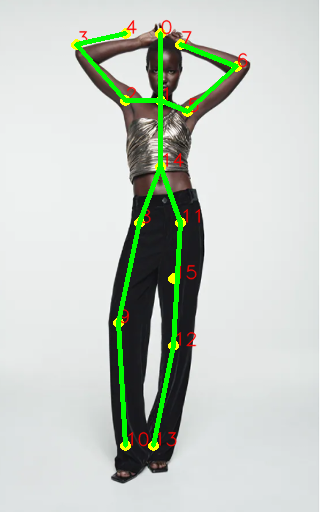



------------------------- Image : model6.PNG -------------------------

============================== MPII Model ==============================
[pointed] Head (0) => prob: 0.71865 / x: 173 / y: 11
[pointed] Neck (1) => prob: 0.76801 / x: 166 / y: 77
[pointed] RShoulder (2) => prob: 0.46452 / x: 132 / y: 89
[pointed] RElbow (3) => prob: 0.76049 / x: 104 / y: 111
[pointed] RWrist (4) => prob: 0.57149 / x: 139 / y: 66
[pointed] LShoulder (5) => prob: 0.70492 / x: 208 / y: 100
[pointed] LElbow (6) => prob: 0.64734 / x: 215 / y: 178
[pointed] LWrist (7) => prob: 0.69348 / x: 222 / y: 244
[pointed] RHip (8) => prob: 0.44939 / x: 146 / y: 211
[pointed] RKnee (9) => prob: 0.17943 / x: 146 / y: 345
[pointed] RAnkle (10) => prob: 0.16419 / x: 160 / y: 445
[pointed] LHip (11) => prob: 0.24456 / x: 187 / y: 200
[pointed] LKnee (12) => prob: 0.34630 / x: 104 / y: 322
[pointed] LAnkle (13) => prob: 0.23823 / x: 132 / y: 445
[pointed] Chest (14) => prob: 0.56800 / x: 166 / y: 144
[pointed] Backgro

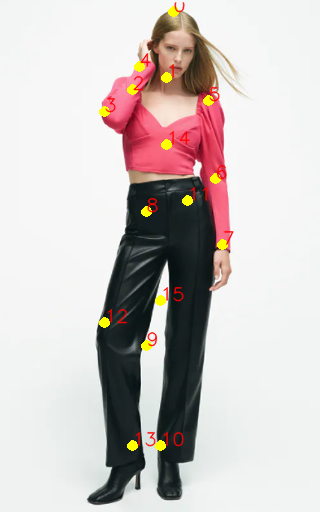


[linked] 0 (173, 11) <=> 1 (166, 77)
[linked] 1 (166, 77) <=> 2 (132, 89)
[linked] 1 (166, 77) <=> 5 (208, 100)
[linked] 1 (166, 77) <=> 14 (166, 144)
[linked] 2 (132, 89) <=> 3 (104, 111)
[linked] 3 (104, 111) <=> 4 (139, 66)
[linked] 5 (208, 100) <=> 6 (215, 178)
[linked] 6 (215, 178) <=> 7 (222, 244)
[linked] 8 (146, 211) <=> 9 (146, 345)
[linked] 9 (146, 345) <=> 10 (160, 445)
[linked] 11 (187, 200) <=> 12 (104, 322)
[linked] 12 (104, 322) <=> 13 (132, 445)
[linked] 14 (166, 144) <=> 8 (146, 211)
[linked] 14 (166, 144) <=> 11 (187, 200)


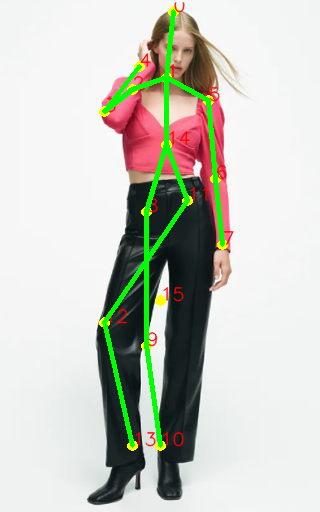



------------------------- Image : model.PNG -------------------------

============================== MPII Model ==============================
[pointed] Head (0) => prob: 0.74846 / x: 139 / y: 33
[pointed] Neck (1) => prob: 0.77003 / x: 139 / y: 100
[pointed] RShoulder (2) => prob: 0.70735 / x: 104 / y: 122
[pointed] RElbow (3) => prob: 0.72572 / x: 90 / y: 189
[pointed] RWrist (4) => prob: 0.49537 / x: 97 / y: 211
[pointed] LShoulder (5) => prob: 0.65502 / x: 173 / y: 111
[pointed] LElbow (6) => prob: 0.58199 / x: 187 / y: 178
[pointed] LWrist (7) => prob: 0.55608 / x: 180 / y: 222
[pointed] RHip (8) => prob: 0.49432 / x: 125 / y: 233
[pointed] RKnee (9) => prob: 0.38744 / x: 125 / y: 345
[pointed] RAnkle (10) => prob: 0.52748 / x: 139 / y: 434
[pointed] LHip (11) => prob: 0.43312 / x: 166 / y: 233
[pointed] LKnee (12) => prob: 0.54738 / x: 180 / y: 333
[pointed] LAnkle (13) => prob: 0.62921 / x: 166 / y: 434
[pointed] Chest (14) => prob: 0.75313 / x: 139 / y: 178
[pointed] Backgro

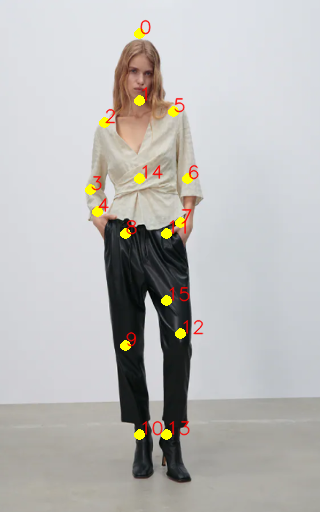


[linked] 0 (139, 33) <=> 1 (139, 100)
[linked] 1 (139, 100) <=> 2 (104, 122)
[linked] 1 (139, 100) <=> 5 (173, 111)
[linked] 1 (139, 100) <=> 14 (139, 178)
[linked] 2 (104, 122) <=> 3 (90, 189)
[linked] 3 (90, 189) <=> 4 (97, 211)
[linked] 5 (173, 111) <=> 6 (187, 178)
[linked] 6 (187, 178) <=> 7 (180, 222)
[linked] 8 (125, 233) <=> 9 (125, 345)
[linked] 9 (125, 345) <=> 10 (139, 434)
[linked] 11 (166, 233) <=> 12 (180, 333)
[linked] 12 (180, 333) <=> 13 (166, 434)
[linked] 14 (139, 178) <=> 8 (125, 233)
[linked] 14 (139, 178) <=> 11 (166, 233)


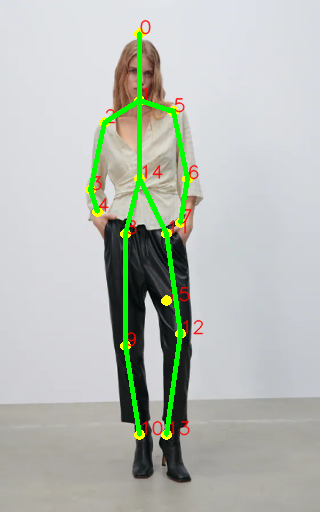



------------------------- Image : model3.PNG -------------------------

============================== MPII Model ==============================
[pointed] Head (0) => prob: 0.81250 / x: 146 / y: 11
[pointed] Neck (1) => prob: 0.83499 / x: 153 / y: 77
[pointed] RShoulder (2) => prob: 0.62019 / x: 111 / y: 100
[pointed] RElbow (3) => prob: 0.70807 / x: 111 / y: 166
[pointed] RWrist (4) => prob: 0.75737 / x: 104 / y: 244
[pointed] LShoulder (5) => prob: 0.66862 / x: 187 / y: 100
[pointed] LElbow (6) => prob: 0.68309 / x: 194 / y: 178
[pointed] LWrist (7) => prob: 0.80778 / x: 201 / y: 233
[pointed] RHip (8) => prob: 0.49499 / x: 132 / y: 222
[pointed] RKnee (9) => prob: 0.48351 / x: 132 / y: 356
[pointed] RAnkle (10) => prob: 0.31076 / x: 132 / y: 456
[pointed] LHip (11) => prob: 0.54353 / x: 173 / y: 211
[pointed] LKnee (12) => prob: 0.46299 / x: 180 / y: 345
[pointed] LAnkle (13) => prob: 0.46178 / x: 173 / y: 445
[pointed] Chest (14) => prob: 0.72126 / x: 153 / y: 155
[pointed] Backg

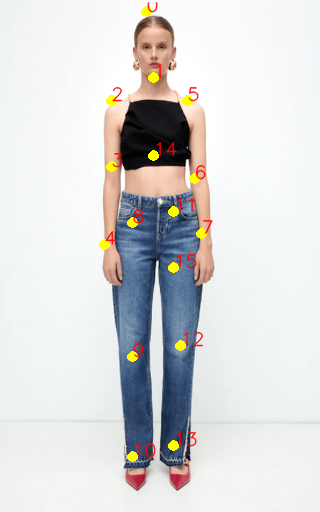


[linked] 0 (146, 11) <=> 1 (153, 77)
[linked] 1 (153, 77) <=> 2 (111, 100)
[linked] 1 (153, 77) <=> 5 (187, 100)
[linked] 1 (153, 77) <=> 14 (153, 155)
[linked] 2 (111, 100) <=> 3 (111, 166)
[linked] 3 (111, 166) <=> 4 (104, 244)
[linked] 5 (187, 100) <=> 6 (194, 178)
[linked] 6 (194, 178) <=> 7 (201, 233)
[linked] 8 (132, 222) <=> 9 (132, 356)
[linked] 9 (132, 356) <=> 10 (132, 456)
[linked] 11 (173, 211) <=> 12 (180, 345)
[linked] 12 (180, 345) <=> 13 (173, 445)
[linked] 14 (153, 155) <=> 8 (132, 222)
[linked] 14 (153, 155) <=> 11 (173, 211)


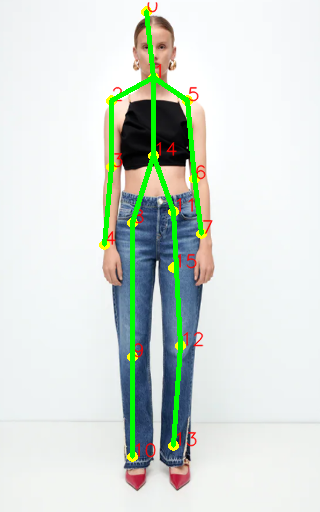



------------------------- Image : model2.PNG -------------------------

============================== MPII Model ==============================
[pointed] Head (0) => prob: 0.76602 / x: 166 / y: 22
[pointed] Neck (1) => prob: 0.79983 / x: 166 / y: 89
[pointed] RShoulder (2) => prob: 0.68553 / x: 139 / y: 111
[pointed] RElbow (3) => prob: 0.44982 / x: 104 / y: 166
[pointed] RWrist (4) => prob: 0.53038 / x: 118 / y: 189
[pointed] LShoulder (5) => prob: 0.76844 / x: 208 / y: 111
[pointed] LElbow (6) => prob: 0.89935 / x: 236 / y: 166
[pointed] LWrist (7) => prob: 0.71838 / x: 201 / y: 211
[pointed] RHip (8) => prob: 0.42390 / x: 146 / y: 211
[pointed] RKnee (9) => prob: 0.43781 / x: 139 / y: 322
[pointed] RAnkle (10) => prob: 0.30977 / x: 146 / y: 434
[pointed] LHip (11) => prob: 0.45978 / x: 187 / y: 222
[pointed] LKnee (12) => prob: 0.31512 / x: 201 / y: 322
[pointed] LAnkle (13) => prob: 0.10622 / x: 215 / y: 445
[pointed] Chest (14) => prob: 0.70774 / x: 166 / y: 166
[pointed] Backg

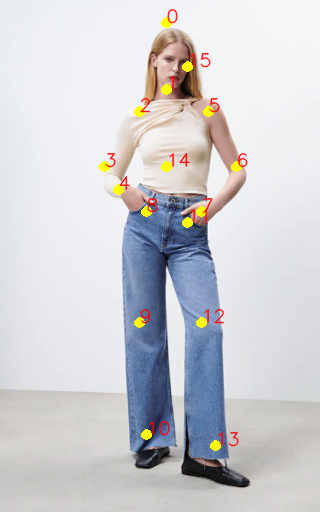


[linked] 0 (166, 22) <=> 1 (166, 89)
[linked] 1 (166, 89) <=> 2 (139, 111)
[linked] 1 (166, 89) <=> 5 (208, 111)
[linked] 1 (166, 89) <=> 14 (166, 166)
[linked] 2 (139, 111) <=> 3 (104, 166)
[linked] 3 (104, 166) <=> 4 (118, 189)
[linked] 5 (208, 111) <=> 6 (236, 166)
[linked] 6 (236, 166) <=> 7 (201, 211)
[linked] 8 (146, 211) <=> 9 (139, 322)
[linked] 9 (139, 322) <=> 10 (146, 434)
[linked] 11 (187, 222) <=> 12 (201, 322)
[linked] 12 (201, 322) <=> 13 (215, 445)
[linked] 14 (166, 166) <=> 8 (146, 211)
[linked] 14 (166, 166) <=> 11 (187, 222)


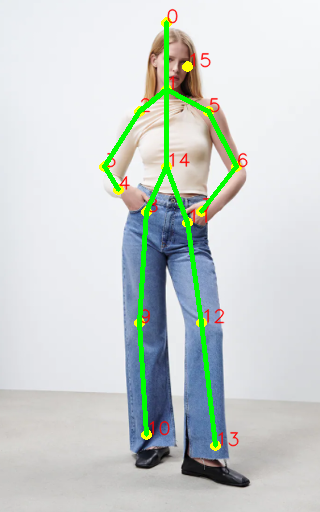



------------------------- Image : model4.PNG -------------------------

============================== MPII Model ==============================
[pointed] Head (0) => prob: 0.19942 / x: 208 / y: 55
[pointed] Neck (1) => prob: 0.58651 / x: 194 / y: 166
[pointed] RShoulder (2) => prob: 0.46961 / x: 118 / y: 200
[pointed] RElbow (3) => prob: 0.28561 / x: 76 / y: 311
[pointed] RWrist (4) => prob: 0.43309 / x: 41 / y: 434
[pointed] LShoulder (5) => prob: 0.17315 / x: 222 / y: 278
[pointed] LElbow (6) => prob: 0.36711 / x: 229 / y: 322
[pointed] LWrist (7) => prob: 0.45887 / x: 222 / y: 434
[not pointed] RHip (8) => prob: 0.07422 / x: 125 / y: 411
[not pointed] RKnee (9) => prob: 0.07357 / x: 118 / y: 211
[not pointed] RAnkle (10) => prob: 0.03361 / x: 222 / y: 434
[pointed] LHip (11) => prob: 0.10474 / x: 118 / y: 411
[not pointed] LKnee (12) => prob: 0.04554 / x: 236 / y: 222
[not pointed] LAnkle (13) => prob: 0.05434 / x: 222 / y: 434
[pointed] Chest (14) => prob: 0.27488 / x: 160 / y: 

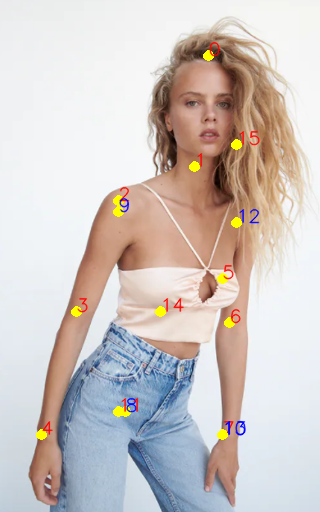


[linked] 0 (208, 55) <=> 1 (194, 166)
[linked] 1 (194, 166) <=> 2 (118, 200)
[linked] 1 (194, 166) <=> 5 (222, 278)
[linked] 1 (194, 166) <=> 14 (160, 311)
[linked] 2 (118, 200) <=> 3 (76, 311)
[linked] 3 (76, 311) <=> 4 (41, 434)
[linked] 5 (222, 278) <=> 6 (229, 322)
[linked] 6 (229, 322) <=> 7 (222, 434)
[not linked] 8 None <=> 9 None
[not linked] 9 None <=> 10 None
[not linked] 11 (118, 411) <=> 12 None
[not linked] 12 None <=> 13 None
[not linked] 14 (160, 311) <=> 8 None
[linked] 14 (160, 311) <=> 11 (118, 411)


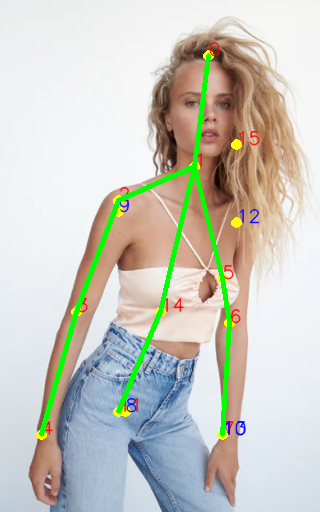

In [ ]:
### MPII ###

# 각 부위별 할당된 관절 번호
BODY_PARTS_MPI = {0: "Head", 1: "Neck", 2: "RShoulder", 3: "RElbow", 4: "RWrist",
                  5: "LShoulder", 6: "LElbow", 7: "LWrist", 8: "RHip", 9: "RKnee",
                  10: "RAnkle", 11: "LHip", 12: "LKnee", 13: "LAnkle", 14: "Chest",
                  15: "Background"}

# 관절들을 선으로 이을 때 쌍이 되는 것들
POSE_PAIRS_MPI = [[0, 1], [1, 2], [1, 5], [1, 14], [2, 3], [3, 4], [5, 6],
                  [6, 7], [8, 9], [9, 10], [11, 12], [12, 13], [14, 8], [14, 11]]


# 신경 네트워크의 구조를 지정하는 prototxt 파일 (다양한 계층이 배열되는 방법 등)
protoFile_mpi = "/content/drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/openpose-master/models/pose/mpi/pose_deploy_linevec.prototxt"
protoFile_mpi_faster = "/content/drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/openpose-master/models/pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"

# 훈련된 모델의 weight를 저장하는 caffemodel 파일
weightsFile_mpi = "/content/drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/openpose-master/models/pose/mpi/pose_iter_160000.caffemodel"

# 이미지 경로
path = "/content/drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/M3D-VTON/mpv3d_example/image/원본/"
model_list = [i for i in os.listdir(path) if i.startswith('model')]

# 모든 이미지에 대해 적용
for i in range(len(model_list)):

    # 키포인트를 저장할 빈 리스트
    points = []

    # 이미지 읽어오기
    print(f"\n\n------------------------- Image : {model_list[i]} -------------------------")
    frame_mpii = cv2.imread(path + model_list[i])

    # MPII Model
    frame_MPII = output_keypoints(frame=frame_mpii, proto_file=protoFile_mpi_faster, weights_file=weightsFile_mpi,
                                 threshold=0.1, model_name="MPII", BODY_PARTS=BODY_PARTS_MPI)
    output_keypoints_with_lines(frame=frame_MPII, POSE_PAIRS=POSE_PAIRS_MPI)



------------------------- Image : model5.PNG -------------------------

============================== COCO Model ==============================
[pointed] Nose (0) => prob: 0.80857 / x: 160 / y: 77
[pointed] Neck (1) => prob: 0.71829 / x: 160 / y: 111
[pointed] RShoulder (2) => prob: 0.71058 / x: 132 / y: 100
[pointed] RElbow (3) => prob: 0.69414 / x: 76 / y: 44
[pointed] RWrist (4) => prob: 0.51994 / x: 139 / y: 33
[pointed] LShoulder (5) => prob: 0.71857 / x: 180 / y: 111
[pointed] LElbow (6) => prob: 0.73346 / x: 236 / y: 55
[pointed] LWrist (7) => prob: 0.48795 / x: 187 / y: 44
[pointed] RHip (8) => prob: 0.51580 / x: 139 / y: 222
[pointed] RKnee (9) => prob: 0.47445 / x: 125 / y: 333
[pointed] RAnkle (10) => prob: 0.46597 / x: 125 / y: 456
[pointed] LHip (11) => prob: 0.50549 / x: 180 / y: 222
[pointed] LKnee (12) => prob: 0.56327 / x: 173 / y: 345
[pointed] LAnkle (13) => prob: 0.52976 / x: 160 / y: 445
[pointed] REye (14) => prob: 0.87908 / x: 153 / y: 66
[pointed] LEye (15) =

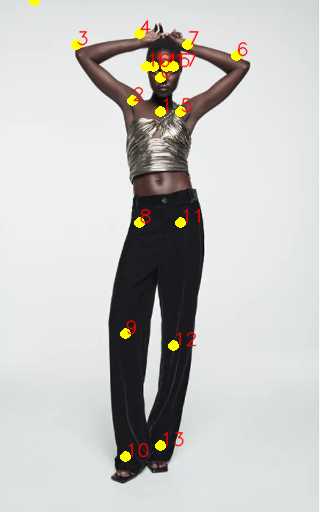


[linked] 0 (160, 77) <=> 1 (160, 111)
[linked] 0 (160, 77) <=> 14 (153, 66)
[linked] 0 (160, 77) <=> 15 (166, 66)
[linked] 1 (160, 111) <=> 2 (132, 100)
[linked] 1 (160, 111) <=> 5 (180, 111)
[linked] 1 (160, 111) <=> 8 (139, 222)
[linked] 1 (160, 111) <=> 11 (180, 222)
[linked] 2 (132, 100) <=> 3 (76, 44)
[linked] 3 (76, 44) <=> 4 (139, 33)
[linked] 5 (180, 111) <=> 6 (236, 55)
[linked] 6 (236, 55) <=> 7 (187, 44)
[linked] 8 (139, 222) <=> 9 (125, 333)
[linked] 9 (125, 333) <=> 10 (125, 456)
[linked] 12 (173, 345) <=> 13 (160, 445)
[linked] 11 (180, 222) <=> 12 (173, 345)
[linked] 14 (153, 66) <=> 16 (146, 66)
[linked] 15 (166, 66) <=> 17 (173, 66)


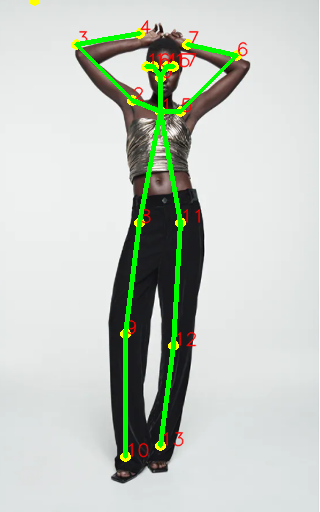



------------------------- Image : model6.PNG -------------------------

============================== COCO Model ==============================
[pointed] Nose (0) => prob: 0.83469 / x: 173 / y: 55
[pointed] Neck (1) => prob: 0.72251 / x: 166 / y: 89
[pointed] RShoulder (2) => prob: 0.59491 / x: 139 / y: 77
[pointed] RElbow (3) => prob: 0.60409 / x: 111 / y: 111
[pointed] RWrist (4) => prob: 0.56358 / x: 139 / y: 55
[pointed] LShoulder (5) => prob: 0.68896 / x: 201 / y: 100
[pointed] LElbow (6) => prob: 0.61978 / x: 215 / y: 166
[pointed] LWrist (7) => prob: 0.68877 / x: 222 / y: 233
[pointed] RHip (8) => prob: 0.46937 / x: 139 / y: 211
[pointed] RKnee (9) => prob: 0.58187 / x: 111 / y: 322
[pointed] RAnkle (10) => prob: 0.26432 / x: 125 / y: 445
[pointed] LHip (11) => prob: 0.47589 / x: 187 / y: 211
[pointed] LKnee (12) => prob: 0.36239 / x: 180 / y: 333
[pointed] LAnkle (13) => prob: 0.33391 / x: 166 / y: 445
[pointed] REye (14) => prob: 0.77841 / x: 166 / y: 44
[pointed] LEye (15)

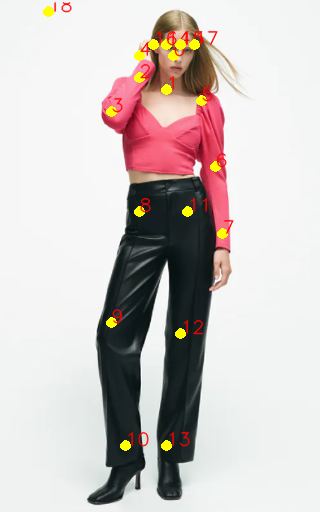


[linked] 0 (173, 55) <=> 1 (166, 89)
[linked] 0 (173, 55) <=> 14 (166, 44)
[linked] 0 (173, 55) <=> 15 (180, 44)
[linked] 1 (166, 89) <=> 2 (139, 77)
[linked] 1 (166, 89) <=> 5 (201, 100)
[linked] 1 (166, 89) <=> 8 (139, 211)
[linked] 1 (166, 89) <=> 11 (187, 211)
[linked] 2 (139, 77) <=> 3 (111, 111)
[linked] 3 (111, 111) <=> 4 (139, 55)
[linked] 5 (201, 100) <=> 6 (215, 166)
[linked] 6 (215, 166) <=> 7 (222, 233)
[linked] 8 (139, 211) <=> 9 (111, 322)
[linked] 9 (111, 322) <=> 10 (125, 445)
[linked] 12 (180, 333) <=> 13 (166, 445)
[linked] 11 (187, 211) <=> 12 (180, 333)
[linked] 14 (166, 44) <=> 16 (153, 44)
[linked] 15 (180, 44) <=> 17 (194, 44)


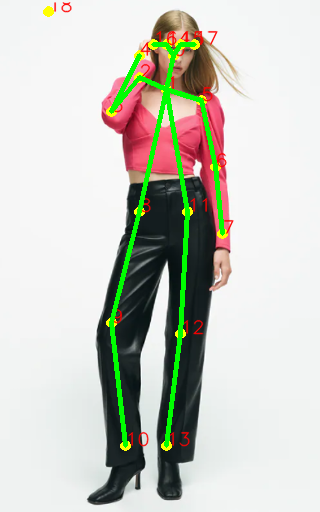



------------------------- Image : model.PNG -------------------------

============================== COCO Model ==============================
[pointed] Nose (0) => prob: 0.81564 / x: 139 / y: 77
[pointed] Neck (1) => prob: 0.76872 / x: 139 / y: 111
[pointed] RShoulder (2) => prob: 0.74501 / x: 104 / y: 122
[pointed] RElbow (3) => prob: 0.64717 / x: 90 / y: 189
[pointed] RWrist (4) => prob: 0.54386 / x: 104 / y: 222
[pointed] LShoulder (5) => prob: 0.66490 / x: 166 / y: 111
[pointed] LElbow (6) => prob: 0.57074 / x: 187 / y: 166
[pointed] LWrist (7) => prob: 0.62117 / x: 180 / y: 211
[pointed] RHip (8) => prob: 0.50974 / x: 125 / y: 233
[pointed] RKnee (9) => prob: 0.67662 / x: 125 / y: 345
[pointed] RAnkle (10) => prob: 0.62149 / x: 139 / y: 434
[pointed] LHip (11) => prob: 0.53427 / x: 166 / y: 233
[pointed] LKnee (12) => prob: 0.67041 / x: 173 / y: 333
[pointed] LAnkle (13) => prob: 0.67854 / x: 166 / y: 434
[pointed] REye (14) => prob: 0.88883 / x: 132 / y: 66
[pointed] LEye (15

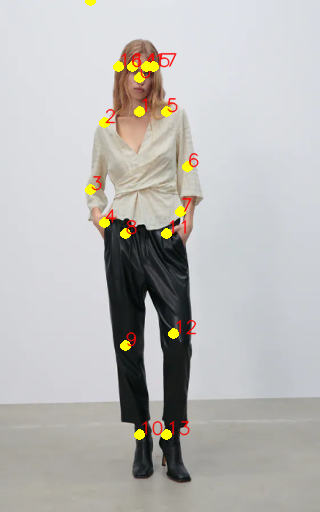


[linked] 0 (139, 77) <=> 1 (139, 111)
[linked] 0 (139, 77) <=> 14 (132, 66)
[linked] 0 (139, 77) <=> 15 (146, 66)
[linked] 1 (139, 111) <=> 2 (104, 122)
[linked] 1 (139, 111) <=> 5 (166, 111)
[linked] 1 (139, 111) <=> 8 (125, 233)
[linked] 1 (139, 111) <=> 11 (166, 233)
[linked] 2 (104, 122) <=> 3 (90, 189)
[linked] 3 (90, 189) <=> 4 (104, 222)
[linked] 5 (166, 111) <=> 6 (187, 166)
[linked] 6 (187, 166) <=> 7 (180, 211)
[linked] 8 (125, 233) <=> 9 (125, 345)
[linked] 9 (125, 345) <=> 10 (139, 434)
[linked] 12 (173, 333) <=> 13 (166, 434)
[linked] 11 (166, 233) <=> 12 (173, 333)
[linked] 14 (132, 66) <=> 16 (118, 66)
[linked] 15 (146, 66) <=> 17 (153, 66)


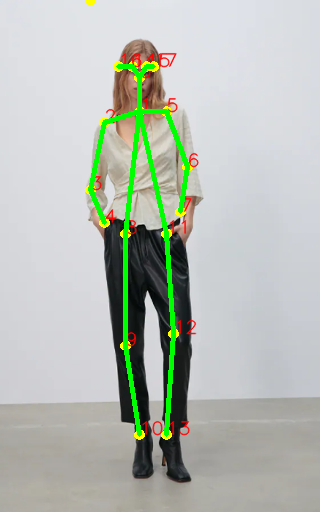



------------------------- Image : model3.PNG -------------------------

============================== COCO Model ==============================
[pointed] Nose (0) => prob: 0.85160 / x: 153 / y: 44
[pointed] Neck (1) => prob: 0.83934 / x: 153 / y: 100
[pointed] RShoulder (2) => prob: 0.69467 / x: 118 / y: 100
[pointed] RElbow (3) => prob: 0.73946 / x: 111 / y: 178
[pointed] RWrist (4) => prob: 0.81741 / x: 104 / y: 233
[pointed] LShoulder (5) => prob: 0.67614 / x: 187 / y: 100
[pointed] LElbow (6) => prob: 0.72799 / x: 194 / y: 166
[pointed] LWrist (7) => prob: 0.82075 / x: 201 / y: 233
[pointed] RHip (8) => prob: 0.50801 / x: 132 / y: 222
[pointed] RKnee (9) => prob: 0.49741 / x: 125 / y: 345
[pointed] RAnkle (10) => prob: 0.41356 / x: 132 / y: 445
[pointed] LHip (11) => prob: 0.48897 / x: 173 / y: 222
[pointed] LKnee (12) => prob: 0.63684 / x: 173 / y: 345
[pointed] LAnkle (13) => prob: 0.52791 / x: 173 / y: 445
[pointed] REye (14) => prob: 0.73794 / x: 146 / y: 44
[pointed] LEye (

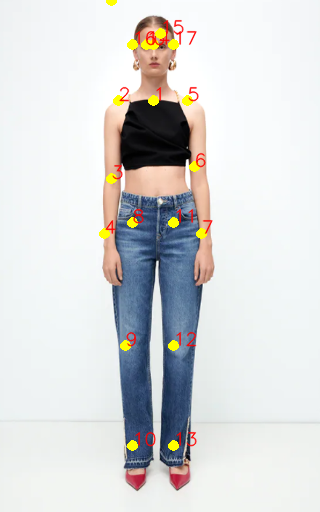


[linked] 0 (153, 44) <=> 1 (153, 100)
[linked] 0 (153, 44) <=> 14 (146, 44)
[linked] 0 (153, 44) <=> 15 (160, 33)
[linked] 1 (153, 100) <=> 2 (118, 100)
[linked] 1 (153, 100) <=> 5 (187, 100)
[linked] 1 (153, 100) <=> 8 (132, 222)
[linked] 1 (153, 100) <=> 11 (173, 222)
[linked] 2 (118, 100) <=> 3 (111, 178)
[linked] 3 (111, 178) <=> 4 (104, 233)
[linked] 5 (187, 100) <=> 6 (194, 166)
[linked] 6 (194, 166) <=> 7 (201, 233)
[linked] 8 (132, 222) <=> 9 (125, 345)
[linked] 9 (125, 345) <=> 10 (132, 445)
[linked] 12 (173, 345) <=> 13 (173, 445)
[linked] 11 (173, 222) <=> 12 (173, 345)
[linked] 14 (146, 44) <=> 16 (132, 44)
[linked] 15 (160, 33) <=> 17 (173, 44)


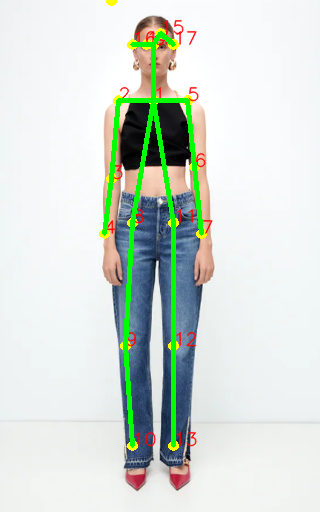



------------------------- Image : model2.PNG -------------------------

============================== COCO Model ==============================
[pointed] Nose (0) => prob: 0.86785 / x: 173 / y: 66
[pointed] Neck (1) => prob: 0.69022 / x: 166 / y: 111
[pointed] RShoulder (2) => prob: 0.62741 / x: 139 / y: 111
[pointed] RElbow (3) => prob: 0.64050 / x: 104 / y: 166
[pointed] RWrist (4) => prob: 0.61367 / x: 125 / y: 189
[pointed] LShoulder (5) => prob: 0.66480 / x: 201 / y: 100
[pointed] LElbow (6) => prob: 0.81765 / x: 236 / y: 166
[pointed] LWrist (7) => prob: 0.69397 / x: 201 / y: 200
[pointed] RHip (8) => prob: 0.56874 / x: 139 / y: 222
[pointed] RKnee (9) => prob: 0.60639 / x: 139 / y: 333
[pointed] RAnkle (10) => prob: 0.47322 / x: 139 / y: 445
[pointed] LHip (11) => prob: 0.53075 / x: 187 / y: 233
[pointed] LKnee (12) => prob: 0.51486 / x: 208 / y: 322
[pointed] LAnkle (13) => prob: 0.18619 / x: 201 / y: 434
[pointed] REye (14) => prob: 0.89522 / x: 166 / y: 55
[pointed] LEye (

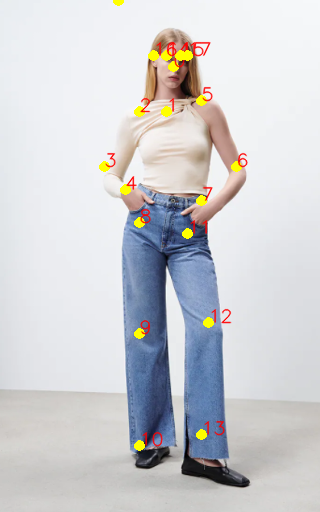


[linked] 0 (173, 66) <=> 1 (166, 111)
[linked] 0 (173, 66) <=> 14 (166, 55)
[linked] 0 (173, 66) <=> 15 (180, 55)
[linked] 1 (166, 111) <=> 2 (139, 111)
[linked] 1 (166, 111) <=> 5 (201, 100)
[linked] 1 (166, 111) <=> 8 (139, 222)
[linked] 1 (166, 111) <=> 11 (187, 233)
[linked] 2 (139, 111) <=> 3 (104, 166)
[linked] 3 (104, 166) <=> 4 (125, 189)
[linked] 5 (201, 100) <=> 6 (236, 166)
[linked] 6 (236, 166) <=> 7 (201, 200)
[linked] 8 (139, 222) <=> 9 (139, 333)
[linked] 9 (139, 333) <=> 10 (139, 445)
[linked] 12 (208, 322) <=> 13 (201, 434)
[linked] 11 (187, 233) <=> 12 (208, 322)
[linked] 14 (166, 55) <=> 16 (153, 55)
[linked] 15 (180, 55) <=> 17 (187, 55)


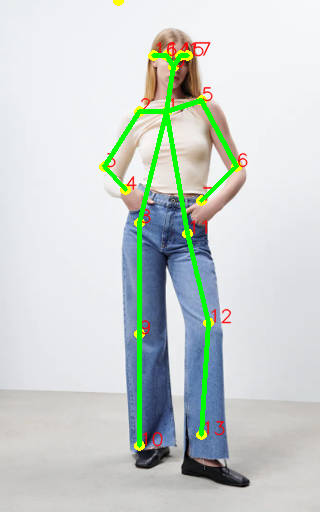



------------------------- Image : model4.PNG -------------------------

============================== COCO Model ==============================
[pointed] Nose (0) => prob: 0.85549 / x: 208 / y: 111
[pointed] Neck (1) => prob: 0.62586 / x: 187 / y: 200
[pointed] RShoulder (2) => prob: 0.51053 / x: 125 / y: 200
[pointed] RElbow (3) => prob: 0.59958 / x: 76 / y: 311
[pointed] RWrist (4) => prob: 0.63875 / x: 41 / y: 422
[pointed] LShoulder (5) => prob: 0.44140 / x: 243 / y: 200
[pointed] LElbow (6) => prob: 0.30175 / x: 236 / y: 322
[pointed] LWrist (7) => prob: 0.60227 / x: 222 / y: 434
[pointed] RHip (8) => prob: 0.25258 / x: 111 / y: 378
[not pointed] RKnee (9) => prob: 0.03309 / x: 83 / y: 500
[not pointed] RAnkle (10) => prob: 0.00756 / x: 264 / y: 489
[pointed] LHip (11) => prob: 0.30516 / x: 180 / y: 389
[not pointed] LKnee (12) => prob: 0.07707 / x: 194 / y: 500
[not pointed] LAnkle (13) => prob: 0.00632 / x: 264 / y: 489
[pointed] REye (14) => prob: 0.79387 / x: 187 / y: 100
[

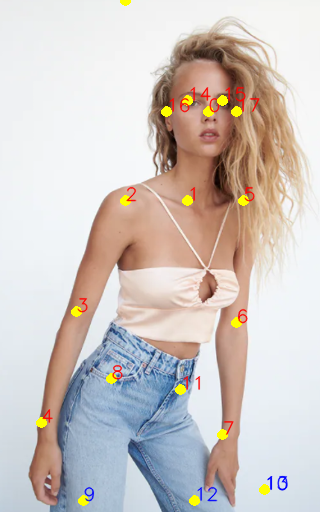


[linked] 0 (208, 111) <=> 1 (187, 200)
[linked] 0 (208, 111) <=> 14 (187, 100)
[linked] 0 (208, 111) <=> 15 (222, 100)
[linked] 1 (187, 200) <=> 2 (125, 200)
[linked] 1 (187, 200) <=> 5 (243, 200)
[linked] 1 (187, 200) <=> 8 (111, 378)
[linked] 1 (187, 200) <=> 11 (180, 389)
[linked] 2 (125, 200) <=> 3 (76, 311)
[linked] 3 (76, 311) <=> 4 (41, 422)
[linked] 5 (243, 200) <=> 6 (236, 322)
[linked] 6 (236, 322) <=> 7 (222, 434)
[not linked] 8 (111, 378) <=> 9 None
[not linked] 9 None <=> 10 None
[not linked] 12 None <=> 13 None
[not linked] 11 (180, 389) <=> 12 None
[linked] 14 (187, 100) <=> 16 (166, 111)
[linked] 15 (222, 100) <=> 17 (236, 111)


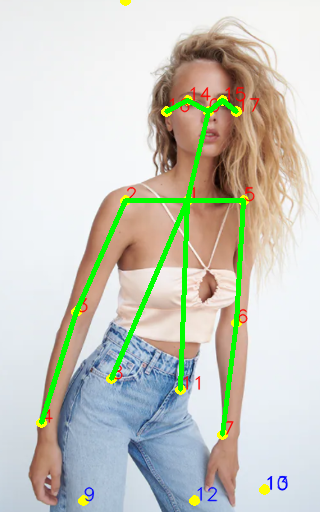

In [ ]:
### COCO ###

import cv2
import time
import numpy as np
from random import randint
import argparse
import json 

BODY_PARTS_COCO = {0: "Nose", 1: "Neck", 2: "RShoulder", 3: "RElbow", 4: "RWrist",
                   5: "LShoulder", 6: "LElbow", 7: "LWrist", 8: "RHip", 9: "RKnee",
                   10: "RAnkle", 11: "LHip", 12: "LKnee", 13: "LAnkle", 14: "REye",
                   15: "LEye", 16: "REar", 17: "LEar", 18: "Background"}

POSE_PAIRS_COCO = [[0, 1], [0, 14], [0, 15], [1, 2], [1, 5], [1, 8], [1, 11], [2, 3], [3, 4],
                   [5, 6], [6, 7], [8, 9], [9, 10], [12, 13], [11, 12], [14, 16], [15, 17]]


# 신경 네트워크의 구조를 지정하는 prototxt 파일 (다양한 계층이 배열되는 방법 등)
protoFile_coco = "/content/drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/openpose-master/models/pose/coco/pose_deploy_linevec.prototxt"

# 훈련된 모델의 weight를 저장하는 caffemodel 파일
weightsFile_coco = "/content/drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/openpose-master/models/pose/coco/pose_iter_440000.caffemodel"

# 이미지 경로
path = "/content/drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/M3D-VTON/mpv3d_example/image/원본/"
model_list = [i for i in os.listdir(path) if i.startswith('model')]

# 이미지 경로의 모든 이미지에 대해 적용
for i in range(len(model_list)):

    # 키포인트를 저장할 빈 리스트
    points = []

    # 이미지 읽어오기
    print(f"\n\n------------------------- Image : {model_list[i]} -------------------------")
    frame_coco = cv2.imread(path + model_list[i])

    # COCO Model
    frame_COCO = output_keypoints(frame=frame_coco, proto_file=protoFile_coco, weights_file=weightsFile_coco,
                                 threshold=0.1, model_name="COCO", BODY_PARTS=BODY_PARTS_COCO)
    output_keypoints_with_lines(frame=frame_COCO, POSE_PAIRS=POSE_PAIRS_COCO)



------------------------- Image : model5.PNG -------------------------

============================== BODY_25 Model ==============================
[pointed] Nose (0) => prob: 0.80815 / x: 160 / y: 66
[pointed] Neck (1) => prob: 0.67526 / x: 160 / y: 111
[pointed] RShoulder (2) => prob: 0.63939 / x: 132 / y: 100
[pointed] RElbow (3) => prob: 0.72965 / x: 76 / y: 44
[not pointed] RWrist (4) => prob: 0.00740 / x: 104 / y: 44
[pointed] LShoulder (5) => prob: 0.66857 / x: 180 / y: 111
[pointed] LElbow (6) => prob: 0.63477 / x: 236 / y: 66
[pointed] LWrist (7) => prob: 0.12905 / x: 187 / y: 44
[pointed] MidHip (8) => prob: 0.60214 / x: 160 / y: 222
[pointed] RHip (9) => prob: 0.57876 / x: 139 / y: 222
[pointed] RKnee (10) => prob: 0.54844 / x: 118 / y: 311
[pointed] RAnkle (11) => prob: 0.58310 / x: 132 / y: 445
[pointed] LHip (12) => prob: 0.47733 / x: 180 / y: 222
[pointed] LKnee (13) => prob: 0.51155 / x: 173 / y: 333
[pointed] LAnkle (14) => prob: 0.56660 / x: 160 / y: 434
[pointed] R

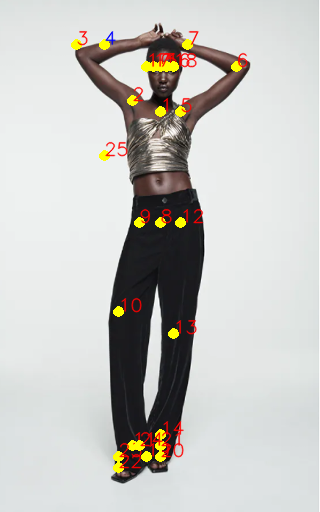


[linked] 0 (160, 66) <=> 1 (160, 111)
[linked] 0 (160, 66) <=> 15 (153, 66)
[linked] 0 (160, 66) <=> 16 (166, 66)
[linked] 1 (160, 111) <=> 2 (132, 100)
[linked] 1 (160, 111) <=> 5 (180, 111)
[linked] 1 (160, 111) <=> 8 (160, 222)
[linked] 8 (160, 222) <=> 9 (139, 222)
[linked] 8 (160, 222) <=> 12 (180, 222)
[linked] 9 (139, 222) <=> 10 (118, 311)
[linked] 12 (180, 222) <=> 13 (173, 333)
[linked] 2 (132, 100) <=> 3 (76, 44)
[not linked] 3 (76, 44) <=> 4 None
[linked] 5 (180, 111) <=> 6 (236, 66)
[linked] 6 (236, 66) <=> 7 (187, 44)
[linked] 10 (118, 311) <=> 11 (132, 445)
[linked] 13 (173, 333) <=> 14 (160, 434)
[linked] 15 (153, 66) <=> 17 (146, 66)
[linked] 16 (166, 66) <=> 18 (173, 66)
[linked] 14 (160, 434) <=> 21 (160, 445)
[linked] 19 (146, 456) <=> 21 (160, 445)
[linked] 20 (160, 456) <=> 21 (160, 445)
[linked] 11 (132, 445) <=> 24 (139, 445)
[linked] 22 (118, 467) <=> 24 (139, 445)
[linked] 23 (118, 456) <=> 24 (139, 445)


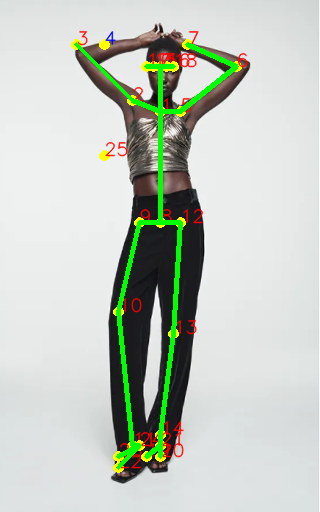

[(160, 66), (160, 111), (132, 100), (76, 44), None, (180, 111), (236, 66), (187, 44), (160, 222), (139, 222), (118, 311), (132, 445), (180, 222), (173, 333), (160, 434), (153, 66), (166, 66), (146, 66), (173, 66), (146, 456), (160, 456), (160, 445), (118, 467), (118, 456), (139, 445), (104, 155)]


------------------------- Image : model6.PNG -------------------------

============================== BODY_25 Model ==============================
[pointed] Nose (0) => prob: 0.80438 / x: 173 / y: 55
[pointed] Neck (1) => prob: 0.76002 / x: 166 / y: 89
[pointed] RShoulder (2) => prob: 0.59232 / x: 132 / y: 89
[pointed] RElbow (3) => prob: 0.79748 / x: 111 / y: 111
[pointed] RWrist (4) => prob: 0.62874 / x: 139 / y: 66
[pointed] LShoulder (5) => prob: 0.64686 / x: 201 / y: 100
[pointed] LElbow (6) => prob: 0.62524 / x: 215 / y: 166
[pointed] LWrist (7) => prob: 0.64737 / x: 222 / y: 233
[pointed] MidHip (8) => prob: 0.53778 / x: 160 / y: 233
[pointed] RHip (9) => prob: 0.50071 / x: 132 / y: 

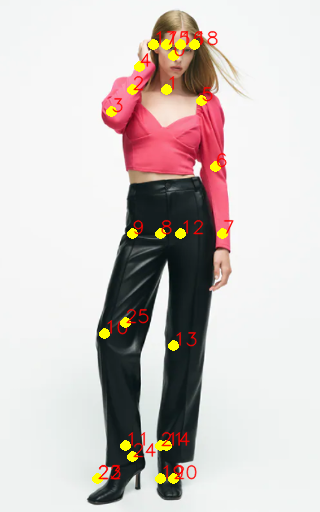


[linked] 0 (173, 55) <=> 1 (166, 89)
[linked] 0 (173, 55) <=> 15 (166, 44)
[linked] 0 (173, 55) <=> 16 (180, 44)
[linked] 1 (166, 89) <=> 2 (132, 89)
[linked] 1 (166, 89) <=> 5 (201, 100)
[linked] 1 (166, 89) <=> 8 (160, 233)
[linked] 8 (160, 233) <=> 9 (132, 233)
[linked] 8 (160, 233) <=> 12 (180, 233)
[linked] 9 (132, 233) <=> 10 (104, 333)
[linked] 12 (180, 233) <=> 13 (173, 345)
[linked] 2 (132, 89) <=> 3 (111, 111)
[linked] 3 (111, 111) <=> 4 (139, 66)
[linked] 5 (201, 100) <=> 6 (215, 166)
[linked] 6 (215, 166) <=> 7 (222, 233)
[linked] 10 (104, 333) <=> 11 (125, 445)
[linked] 13 (173, 345) <=> 14 (166, 445)
[linked] 15 (166, 44) <=> 17 (153, 44)
[linked] 16 (180, 44) <=> 18 (194, 44)
[linked] 14 (166, 445) <=> 21 (160, 445)
[linked] 19 (160, 478) <=> 21 (160, 445)
[linked] 20 (173, 478) <=> 21 (160, 445)
[linked] 11 (125, 445) <=> 24 (132, 456)
[linked] 22 (97, 478) <=> 24 (132, 456)
[linked] 23 (97, 478) <=> 24 (132, 456)


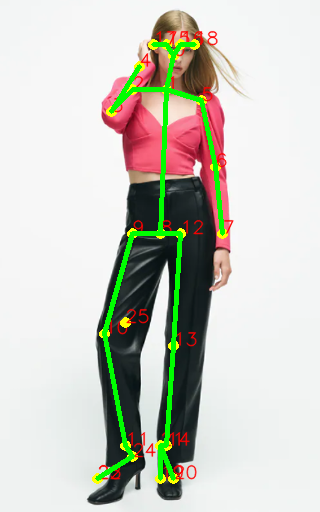

[(173, 55), (166, 89), (132, 89), (111, 111), (139, 66), (201, 100), (215, 166), (222, 233), (160, 233), (132, 233), (104, 333), (125, 445), (180, 233), (173, 345), (166, 445), (166, 44), (180, 44), (153, 44), (194, 44), (160, 478), (173, 478), (160, 445), (97, 478), (97, 478), (132, 456), (125, 322)]


------------------------- Image : model.PNG -------------------------

============================== BODY_25 Model ==============================
[pointed] Nose (0) => prob: 0.80618 / x: 139 / y: 77
[pointed] Neck (1) => prob: 0.73793 / x: 139 / y: 122
[pointed] RShoulder (2) => prob: 0.75679 / x: 104 / y: 122
[pointed] RElbow (3) => prob: 0.68907 / x: 90 / y: 189
[pointed] RWrist (4) => prob: 0.52853 / x: 104 / y: 222
[pointed] LShoulder (5) => prob: 0.66581 / x: 173 / y: 111
[pointed] LElbow (6) => prob: 0.57311 / x: 187 / y: 178
[pointed] LWrist (7) => prob: 0.66742 / x: 187 / y: 222
[pointed] MidHip (8) => prob: 0.57202 / x: 139 / y: 233
[pointed] RHip (9) => prob: 0.55142 / x: 118

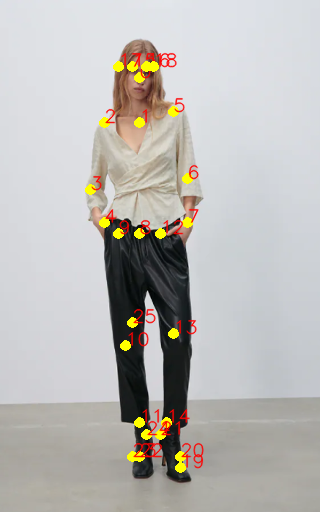


[linked] 0 (139, 77) <=> 1 (139, 122)
[linked] 0 (139, 77) <=> 15 (132, 66)
[linked] 0 (139, 77) <=> 16 (146, 66)
[linked] 1 (139, 122) <=> 2 (104, 122)
[linked] 1 (139, 122) <=> 5 (173, 111)
[linked] 1 (139, 122) <=> 8 (139, 233)
[linked] 8 (139, 233) <=> 9 (118, 233)
[linked] 8 (139, 233) <=> 12 (160, 233)
[linked] 9 (118, 233) <=> 10 (125, 345)
[linked] 12 (160, 233) <=> 13 (173, 333)
[linked] 2 (104, 122) <=> 3 (90, 189)
[linked] 3 (90, 189) <=> 4 (104, 222)
[linked] 5 (173, 111) <=> 6 (187, 178)
[linked] 6 (187, 178) <=> 7 (187, 222)
[linked] 10 (125, 345) <=> 11 (139, 422)
[linked] 13 (173, 333) <=> 14 (166, 422)
[linked] 15 (132, 66) <=> 17 (118, 66)
[linked] 16 (146, 66) <=> 18 (153, 66)
[linked] 14 (166, 422) <=> 21 (160, 434)
[linked] 19 (180, 467) <=> 21 (160, 434)
[linked] 20 (180, 456) <=> 21 (160, 434)
[linked] 11 (139, 422) <=> 24 (146, 434)
[linked] 22 (139, 456) <=> 24 (146, 434)
[linked] 23 (132, 456) <=> 24 (146, 434)


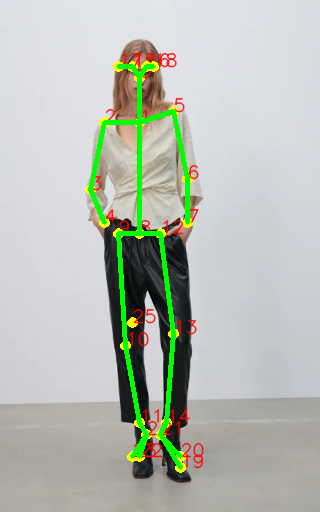

[(139, 77), (139, 122), (104, 122), (90, 189), (104, 222), (173, 111), (187, 178), (187, 222), (139, 233), (118, 233), (125, 345), (139, 422), (160, 233), (173, 333), (166, 422), (132, 66), (146, 66), (118, 66), (153, 66), (180, 467), (180, 456), (160, 434), (139, 456), (132, 456), (146, 434), (132, 322)]


------------------------- Image : model3.PNG -------------------------

============================== BODY_25 Model ==============================
[pointed] Nose (0) => prob: 0.78508 / x: 153 / y: 44
[pointed] Neck (1) => prob: 0.69311 / x: 153 / y: 111
[pointed] RShoulder (2) => prob: 0.65659 / x: 111 / y: 111
[pointed] RElbow (3) => prob: 0.72836 / x: 111 / y: 178
[pointed] RWrist (4) => prob: 0.76199 / x: 104 / y: 244
[pointed] LShoulder (5) => prob: 0.62768 / x: 187 / y: 111
[pointed] LElbow (6) => prob: 0.74449 / x: 194 / y: 178
[pointed] LWrist (7) => prob: 0.84367 / x: 201 / y: 233
[pointed] MidHip (8) => prob: 0.58349 / x: 153 / y: 211
[pointed] RHip (9) => prob: 0.54290 / 

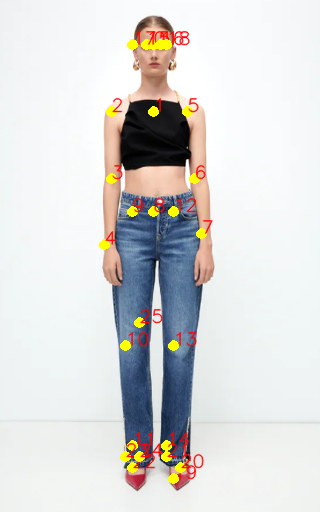


[linked] 0 (153, 44) <=> 1 (153, 111)
[linked] 0 (153, 44) <=> 15 (146, 44)
[linked] 0 (153, 44) <=> 16 (160, 44)
[linked] 1 (153, 111) <=> 2 (111, 111)
[linked] 1 (153, 111) <=> 5 (187, 111)
[linked] 1 (153, 111) <=> 8 (153, 211)
[linked] 8 (153, 211) <=> 9 (132, 211)
[linked] 8 (153, 211) <=> 12 (173, 211)
[linked] 9 (132, 211) <=> 10 (125, 345)
[linked] 12 (173, 211) <=> 13 (173, 345)
[linked] 2 (111, 111) <=> 3 (111, 178)
[linked] 3 (111, 178) <=> 4 (104, 244)
[linked] 5 (187, 111) <=> 6 (194, 178)
[linked] 6 (194, 178) <=> 7 (201, 233)
[linked] 10 (125, 345) <=> 11 (132, 445)
[linked] 13 (173, 345) <=> 14 (166, 445)
[linked] 15 (146, 44) <=> 17 (132, 44)
[linked] 16 (160, 44) <=> 18 (166, 44)
[linked] 14 (166, 445) <=> 21 (166, 456)
[linked] 19 (173, 478) <=> 21 (166, 456)
[linked] 20 (180, 467) <=> 21 (166, 456)
[linked] 11 (132, 445) <=> 24 (139, 456)
[linked] 22 (132, 467) <=> 24 (139, 456)
[linked] 23 (125, 456) <=> 24 (139, 456)


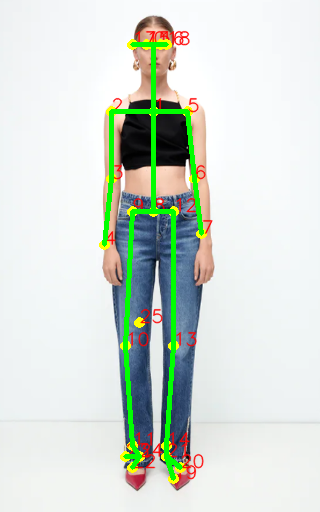

[(153, 44), (153, 111), (111, 111), (111, 178), (104, 244), (187, 111), (194, 178), (201, 233), (153, 211), (132, 211), (125, 345), (132, 445), (173, 211), (173, 345), (166, 445), (146, 44), (160, 44), (132, 44), (166, 44), (173, 478), (180, 467), (166, 456), (132, 467), (125, 456), (139, 456), (139, 322)]


------------------------- Image : model2.PNG -------------------------

============================== BODY_25 Model ==============================
[pointed] Nose (0) => prob: 0.83000 / x: 173 / y: 66
[pointed] Neck (1) => prob: 0.71612 / x: 173 / y: 111
[pointed] RShoulder (2) => prob: 0.69897 / x: 139 / y: 111
[pointed] RElbow (3) => prob: 0.18690 / x: 118 / y: 166
[pointed] RWrist (4) => prob: 0.35496 / x: 125 / y: 178
[pointed] LShoulder (5) => prob: 0.66619 / x: 201 / y: 111
[pointed] LElbow (6) => prob: 0.84347 / x: 236 / y: 166
[pointed] LWrist (7) => prob: 0.75273 / x: 201 / y: 200
[pointed] MidHip (8) => prob: 0.58332 / x: 160 / y: 222
[pointed] RHip (9) => prob: 0.59644 /

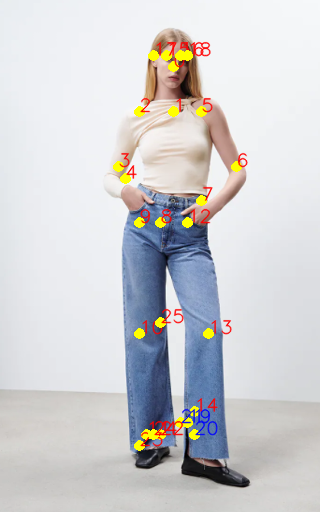


[linked] 0 (173, 66) <=> 1 (173, 111)
[linked] 0 (173, 66) <=> 15 (166, 55)
[linked] 0 (173, 66) <=> 16 (180, 55)
[linked] 1 (173, 111) <=> 2 (139, 111)
[linked] 1 (173, 111) <=> 5 (201, 111)
[linked] 1 (173, 111) <=> 8 (160, 222)
[linked] 8 (160, 222) <=> 9 (139, 222)
[linked] 8 (160, 222) <=> 12 (187, 222)
[linked] 9 (139, 222) <=> 10 (139, 333)
[linked] 12 (187, 222) <=> 13 (208, 333)
[linked] 2 (139, 111) <=> 3 (118, 166)
[linked] 3 (118, 166) <=> 4 (125, 178)
[linked] 5 (201, 111) <=> 6 (236, 166)
[linked] 6 (236, 166) <=> 7 (201, 200)
[linked] 10 (139, 333) <=> 11 (146, 434)
[linked] 13 (208, 333) <=> 14 (194, 411)
[linked] 15 (166, 55) <=> 17 (153, 55)
[linked] 16 (180, 55) <=> 18 (187, 55)
[not linked] 14 (194, 411) <=> 21 None
[not linked] 19 None <=> 21 None
[not linked] 20 None <=> 21 None
[linked] 11 (146, 434) <=> 24 (153, 434)
[linked] 22 (160, 434) <=> 24 (153, 434)
[linked] 23 (139, 445) <=> 24 (153, 434)


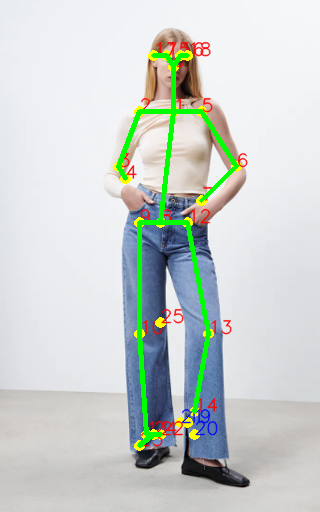

[(173, 66), (173, 111), (139, 111), (118, 166), (125, 178), (201, 111), (236, 166), (201, 200), (160, 222), (139, 222), (139, 333), (146, 434), (187, 222), (208, 333), (194, 411), (166, 55), (180, 55), (153, 55), (187, 55), None, None, None, (160, 434), (139, 445), (153, 434), (160, 322)]


------------------------- Image : model4.PNG -------------------------

============================== BODY_25 Model ==============================
[pointed] Nose (0) => prob: 0.80295 / x: 208 / y: 111
[pointed] Neck (1) => prob: 0.56642 / x: 180 / y: 200
[pointed] RShoulder (2) => prob: 0.46429 / x: 125 / y: 200
[pointed] RElbow (3) => prob: 0.60729 / x: 69 / y: 322
[pointed] RWrist (4) => prob: 0.68087 / x: 41 / y: 422
[pointed] LShoulder (5) => prob: 0.41372 / x: 243 / y: 211
[pointed] LElbow (6) => prob: 0.57204 / x: 229 / y: 322
[pointed] LWrist (7) => prob: 0.60080 / x: 222 / y: 434
[pointed] MidHip (8) => prob: 0.34247 / x: 139 / y: 400
[pointed] RHip (9) => prob: 0.31676 / x: 104 / y: 389
[n

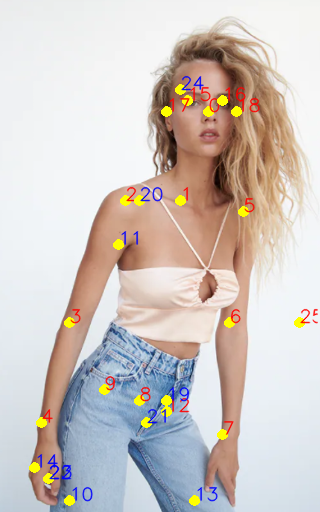


[linked] 0 (208, 111) <=> 1 (180, 200)
[linked] 0 (208, 111) <=> 15 (187, 100)
[linked] 0 (208, 111) <=> 16 (222, 100)
[linked] 1 (180, 200) <=> 2 (125, 200)
[linked] 1 (180, 200) <=> 5 (243, 211)
[linked] 1 (180, 200) <=> 8 (139, 400)
[linked] 8 (139, 400) <=> 9 (104, 389)
[linked] 8 (139, 400) <=> 12 (166, 411)
[not linked] 9 (104, 389) <=> 10 None
[not linked] 12 (166, 411) <=> 13 None
[linked] 2 (125, 200) <=> 3 (69, 322)
[linked] 3 (69, 322) <=> 4 (41, 422)
[linked] 5 (243, 211) <=> 6 (229, 322)
[linked] 6 (229, 322) <=> 7 (222, 434)
[not linked] 10 None <=> 11 None
[not linked] 13 None <=> 14 None
[linked] 15 (187, 100) <=> 17 (166, 111)
[linked] 16 (222, 100) <=> 18 (236, 111)
[not linked] 14 None <=> 21 None
[not linked] 19 None <=> 21 None
[not linked] 20 None <=> 21 None
[not linked] 11 None <=> 24 None
[not linked] 22 None <=> 24 None
[not linked] 23 None <=> 24 None


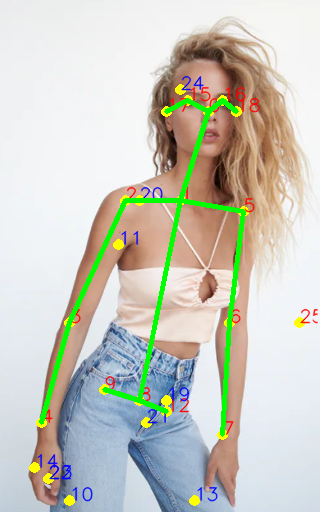

[(208, 111), (180, 200), (125, 200), (69, 322), (41, 422), (243, 211), (229, 322), (222, 434), (139, 400), (104, 389), None, None, (166, 411), None, None, (187, 100), (222, 100), (166, 111), (236, 111), None, None, None, None, None, None, (299, 322)]


In [27]:
### BODY_25 ### 

BODY_PARTS_BODY_25 = {0: "Nose", 1: "Neck", 2: "RShoulder", 3: "RElbow", 4: "RWrist",
                      5: "LShoulder", 6: "LElbow", 7: "LWrist", 8: "MidHip", 9: "RHip",
                      10: "RKnee", 11: "RAnkle", 12: "LHip", 13: "LKnee", 14: "LAnkle",
                      15: "REye", 16: "LEye", 17: "REar", 18: "LEar", 19: "LBigToe",
                      20: "LSmallToe", 21: "LHeel", 22: "RBigToe", 23: "RSmallToe", 24: "RHeel", 25: "Background"}

POSE_PAIRS_BODY_25 = [[0, 1], [0, 15], [0, 16], [1, 2], [1, 5], [1, 8], [8, 9], [8, 12], [9, 10], [12, 13], [2, 3],
                      [3, 4], [5, 6], [6, 7], [10, 11], [13, 14], [15, 17], [16, 18], [14, 21], [19, 21], [20, 21],
                      [11, 24], [22, 24], [23, 24]]

# 신경 네트워크의 구조를 지정하는 prototxt 파일 (다양한 계층이 배열되는 방법 등)
protoFile_body_25 = "/content/drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/openpose-master/models/pose/body_25/pose_deploy.prototxt"

# 훈련된 모델의 weight 를 저장하는 caffemodel 파일
weightsFile_body_25 = "/content/drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/openpose-master/models/pose/body_25/pose_iter_584000.caffemodel"

# 이미지 경로
path = "/content/drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/M3D-VTON/mpv3d_example/image/원본/"
model_list = [i for i in os.listdir(path) if i.startswith('model')]

# 이미지 경로의 모든 이미지에 대해 적용
for i in range(len(model_list)):

    # 키포인트를 저장할 빈 리스트
    points = []

    # 이미지 읽어오기
    print(f"\n\n------------------------- Image : {model_list[i]} -------------------------")
    
    frame_body_25 = cv2.imread(path + model_list[i])

    # BODY_25 Model
    frame_BODY_25 = output_keypoints(frame=frame_body_25, proto_file=protoFile_body_25, weights_file=weightsFile_body_25,
                                 threshold=0.1, model_name="BODY_25", BODY_PARTS=BODY_PARTS_BODY_25)
    output_keypoints_with_lines(frame=frame_BODY_25, POSE_PAIRS=POSE_PAIRS_BODY_25)

    print(points)

In [24]:
a = [208, 111, 0.8029528856277466, 180, 200, 0.5664168000221252, 125, 200, 0.4642927050590515, 69, 322, 0.6072864532470703, 41, 422, 0.6808665990829468, 243, 211, 0.41371986269950867, 229, 322, 0.5720384120941162, 222, 434, 0.6007951498031616, 139, 400, 0.34246695041656494, 104, 389, 0.3167637288570404, 166, 411, 0.30671173334121704, 187, 100, 0.7936125993728638, 222, 100, 0.8215489387512207, 166, 111, 0.8357876539230347, 236, 111, 0.29519107937812805, 299, 322, 1.00033438205719]
len(a)/3

16.0

#### json 파일 추출

In [ ]:
import os
path = "/content/drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/M3D-VTON/mpv3d_example/image/원본/"
model_list = [i for i in os.listdir(path) if i.startswith('model')]
model_list

['model5.PNG',
 'model6.PNG',
 'model.PNG',
 'model3.PNG',
 'model2.PNG',
 'model4.PNG']

/content/drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/M3D-VTON/mpv3d_example/pose
model_list
['model5.PNG', 'model6.PNG', 'model.PNG', 'model3.PNG', 'model2.PNG', 'model4.PNG']


====================================model5.PNG==========================================
Using CPU device
Time Taken in forward pass = 8.227540731430054
Keypoints - Nose : [(160, 73, 0.82307905)]
Keypoints - Neck : [(160, 106, 0.8474762)]
Keypoints - R-Sho : [(127, 105, 0.7816158)]
Keypoints - R-Elb : [(83, 50, 0.7889401)]
Keypoints - R-Wr : [(149, 38, 0.66894454)]
Keypoints - L-Sho : [(192, 106, 0.7041877)]
Keypoints - L-Elb : [(237, 71, 0.8091911)]
Keypoints - L-Wr : [(182, 39, 0.74196976)]
Keypoints - R-Hip : [(160, 228, 0.58230585)]
Keypoints - R-Knee : [(137, 228, 0.5735577)]
Keypoints - R-Ank : [(117, 338, 0.40264305)]
Keypoints - L-Hip : [(127, 450, 0.6815882)]
Keypoints - L-Knee : [(182, 228, 0.54025173)]
Keypoints - L-Ank : [(172, 329, 0.44619942)]
Keypoints - R-Eye : [(160, 440, 0

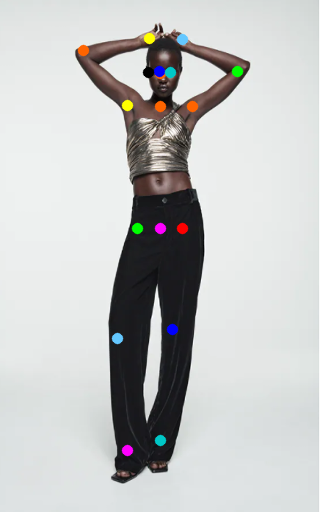

====================================model6.PNG==========================================
Using CPU device
Time Taken in forward pass = 8.341777563095093
Keypoints - Nose : [(180, 60, 0.76439637)]
Keypoints - Neck : [(170, 104, 0.742872)]
Keypoints - R-Sho : [(136, 94, 0.6903713)]
Keypoints - R-Elb : [(115, 116, 0.8126438)]
Keypoints - R-Wr : [(147, 62, 0.558206)]
Keypoints - L-Sho : [(204, 105, 0.82596964)]
Keypoints - L-Elb : [(215, 172, 0.78103316)]
Keypoints - L-Wr : [(225, 239, 0.76410395)]
Keypoints - R-Hip : [(160, 228, 0.5886817)]
Keypoints - R-Knee : [(138, 227, 0.5806715)]
Keypoints - R-Ank : [(115, 329, 0.5648687)]
Keypoints - L-Hip : [(126, 450, 0.50089157)]
Keypoints - L-Knee : [(183, 228, 0.51610875)]
Keypoints - L-Ank : [(182, 338, 0.4020018)]
Keypoints - R-Eye : [(181, 428, 0.21531914)]
Keypoints - L-Eye : [(170, 49, 0.8880672)]
Keypoints - R-Ear : [(182, 49, 0.86037076)]
Keypoints - L-Ear : [(149, 49, 0.74992114)]


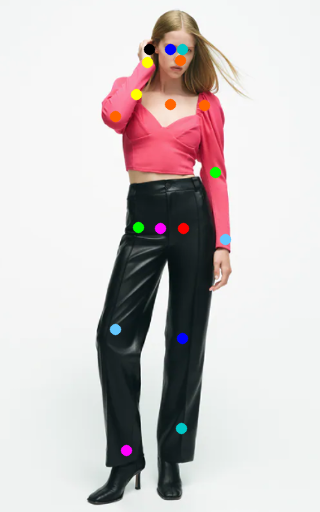

====================================model.PNG==========================================
Using CPU device
Time Taken in forward pass = 8.197298526763916
Keypoints - Nose : [(138, 82, 0.792782)]
Keypoints - Neck : [(138, 117, 0.7998134)]
Keypoints - R-Sho : [(104, 127, 0.8346392)]
Keypoints - R-Elb : [(93, 183, 0.7998509)]
Keypoints - R-Wr : [(94, 216, 0.5914706)]
Keypoints - L-Sho : [(171, 116, 0.82715183)]
Keypoints - L-Elb : [(191, 172, 0.682585)]
Keypoints - L-Wr : [(183, 217, 0.74006367)]
Keypoints - R-Hip : [(138, 239, 0.5540961)]
Keypoints - R-Knee : [(116, 239, 0.54075605)]
Keypoints - R-Ank : [(117, 339, 0.5379907)]
Keypoints - L-Hip : [(138, 428, 0.60392934)]
Keypoints - L-Knee : [(161, 239, 0.53518003)]
Keypoints - L-Ank : [(180, 338, 0.5620989)]
Keypoints - R-Eye : [(171, 429, 0.6644867)]
Keypoints - L-Eye : [(137, 72, 0.8498776)]
Keypoints - R-Ear : [(148, 72, 0.9069249)]
Keypoints - L-Ear : [(125, 72, 0.7077041)]


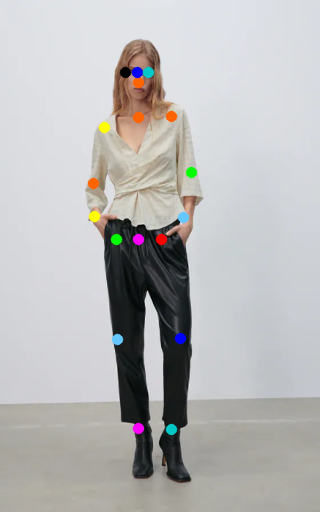

====================================model3.PNG==========================================
Using CPU device
Time Taken in forward pass = 8.441849708557129
Keypoints - Nose : [(149, 50, 0.79913193)]
Keypoints - Neck : [(149, 106, 0.7352445)]
Keypoints - R-Sho : [(115, 115, 0.74915475)]
Keypoints - R-Elb : [(114, 183, 0.7229098)]
Keypoints - R-Wr : [(105, 249, 0.78131574)]
Keypoints - L-Sho : [(192, 106, 0.7049212)]
Keypoints - L-Elb : [(194, 182, 0.7099015)]
Keypoints - L-Wr : [(204, 240, 0.7837067)]
Keypoints - R-Hip : [(159, 217, 0.5695816)]
Keypoints - R-Knee : [(127, 217, 0.57291275)]
Keypoints - R-Ank : [(127, 339, 0.45135224)]
Keypoints - L-Hip : [(137, 438, 0.23759712)]
Keypoints - L-Knee : [(182, 218, 0.6036858)]
Keypoints - L-Ank : [(181, 340, 0.59797835)]
Keypoints - R-Eye : [(171, 450, 0.45116547)]
Keypoints - L-Eye : [(148, 49, 0.81552637)]
Keypoints - R-Ear : [(160, 49, 0.8626996)]
Keypoints - L-Ear : [(137, 50, 0.8376623)]


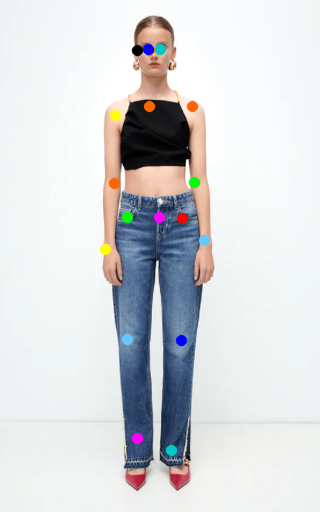

====================================model2.PNG==========================================
Using CPU device
Time Taken in forward pass = 8.268678903579712
Keypoints - Nose : [(171, 62, 0.7692572)]
Keypoints - Neck : [(170, 116, 0.8437205)]
Keypoints - R-Sho : [(137, 116, 0.72137594)]
Keypoints - R-Elb : [(104, 172, 0.8094556)]
Keypoints - R-Wr : [(126, 193, 0.7264338)]
Keypoints - L-Sho : [(204, 106, 0.791286)]
Keypoints - L-Elb : [(236, 172, 0.84615356)]
Keypoints - L-Wr : [(205, 206, 0.77923715)]
Keypoints - R-Hip : [(160, 228, 0.6048148)]
Keypoints - R-Knee : [(138, 227, 0.6506357)]
Keypoints - R-Ank : [(138, 328, 0.64131624)]
Keypoints - L-Hip : [(148, 440, 0.597628)]
Keypoints - L-Knee : [(192, 228, 0.6015291)]
Keypoints - L-Ank : [(204, 328, 0.67107415)]
Keypoints - R-Eye : [(203, 439, 0.57604444)]
Keypoints - L-Eye : [(170, 60, 0.86935693)]
Keypoints - R-Ear : [(182, 61, 0.9171379)]
Keypoints - L-Ear : [(149, 61, 0.8672668)]


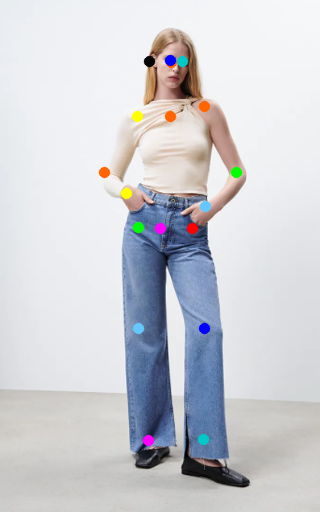

====================================model4.PNG==========================================
Using CPU device
Time Taken in forward pass = 8.177563428878784
Keypoints - Nose : [(205, 116, 0.80889946)]
Keypoints - Neck : [(182, 207, 0.6958426)]
Keypoints - R-Sho : [(127, 205, 0.64189327)]
Keypoints - R-Elb : [(81, 317, 0.64684284)]
Keypoints - R-Wr : [(49, 438, 0.67710114)]
Keypoints - L-Sho : [(238, 217, 0.5811354)]
Keypoints - L-Elb : [(236, 328, 0.66843146)]
Keypoints - L-Wr : [(226, 438, 0.6868138)]
Keypoints - R-Hip : [(137, 395, 0.48192358)]
Keypoints - R-Knee : [(104, 384, 0.3854097)]
Keypoints - R-Ank : []
Keypoints - L-Hip : []
Keypoints - L-Knee : [(171, 405, 0.40785247)]
Keypoints - L-Ank : []
Keypoints - R-Eye : []
Keypoints - L-Eye : [(192, 104, 0.8011084)]
Keypoints - R-Ear : [(225, 105, 0.8180522)]
Keypoints - L-Ear : [(169, 116, 0.76518106)]


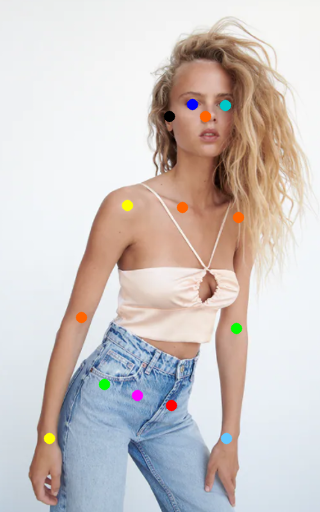

In [ ]:
import cv2
import time
import os
import numpy as np
from random import randint
import argparse
import json 
from google.colab.patches import cv2_imshow
from simple_colors import *

# json 파일 저장할 경로로 이동
%cd /content/drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/M3D-VTON/mpv3d_example/pose/

# 이미지 경로
path = "/content/drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/M3D-VTON/mpv3d_example/image/원본/"
model_list = [i for i in os.listdir(path) if i.startswith('model')]
print(blue('model_list', 'bold'))
print(f'{model_list}\n\n')

# 이미지 경로의 모든 이미지에 대해 적용
for m in range(len(model_list)):

    print(blue(f'===================================={model_list[m]}==========================================', 'bold'))

    image1 = cv2.imread(f"/content/drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/M3D-VTON/mpv3d_example/image/원본/{model_list[m]}")
    protoFile = "/content/drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/openpose-master/models/pose/body_25/pose_deploy.prototxt"
    weightsFile = "/content/drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/openpose-master/models/pose/body_25/pose_iter_584000.caffemodel"
    nPoints = 18

    # COCO Output Format
    keypointsMapping = ['Nose', 'Neck', 'R-Sho', 'R-Elb', 'R-Wr', 'L-Sho', 'L-Elb', 'L-Wr', 'R-Hip', 'R-Knee', 'R-Ank', 'L-Hip', 'L-Knee', 'L-Ank', 'R-Eye', 'L-Eye', 'R-Ear', 'L-Ear']

    POSE_PAIRS = [[1,2], [1,5], [2,3], [3,4], [5,6], [6,7],
                  [1,8], [8,9], [9,10], [1,11], [11,12], [12,13],
                  [1,0], [0,14], [14,16], [0,15], [15,17],
                  [2,17], [5,16] ]

    # index of pafs correspoding to the POSE_PAIRS
    # e.g for POSE_PAIR(1,2), the PAFs are located at indices (31,32) of output, Similarly, (1,5) -> (39,40) and so on.
    mapIdx = [[31,32], [39,40], [33,34], [35,36], [41,42], [43,44],
              [19,20], [21,22], [23,24], [25,26], [27,28], [29,30],
              [47,48], [49,50], [53,54], [51,52], [55,56],
              [37,38], [45,46]]

    colors = [ [0,100,255], [0,100,255], [0,255,255], [0,100,255], [0,255,255], [0,100,255],
             [0,255,0], [255,200,100], [255,0,255], [0,255,0], [255,200,100], [255,0,255],
             [0,0,255], [255,0,0], [200,200,0], [255,0,0], [200,200,0], [0,0,0]]

    def getKeypoints(probMap, threshold=0.1):

        mapSmooth = cv2.GaussianBlur(probMap,(3,3),0,0)

        mapMask = np.uint8(mapSmooth>threshold)
        keypoints = []

        #find the blobs
        contours, _ = cv2.findContours(mapMask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        #for each blob find the maxima
        for cnt in contours:
            blobMask = np.zeros(mapMask.shape)
            blobMask = cv2.fillConvexPoly(blobMask, cnt, 1)
            maskedProbMap = mapSmooth * blobMask
            _, maxVal, _, maxLoc = cv2.minMaxLoc(maskedProbMap)
            keypoints.append(maxLoc + (probMap[maxLoc[1], maxLoc[0]],))

        return keypoints


    # Find valid connections between the different joints of a all persons present
    def getValidPairs(output):
        valid_pairs = []
        invalid_pairs = []
        n_interp_samples = 10
        paf_score_th = 0.1
        conf_th = 0.7
        # loop for every POSE_PAIR
        for k in range(len(mapIdx)):
            # A->B constitute a limb
            pafA = output[0, mapIdx[k][0], :, :]
            pafB = output[0, mapIdx[k][1], :, :]
            pafA = cv2.resize(pafA, (frameWidth, frameHeight))
            pafB = cv2.resize(pafB, (frameWidth, frameHeight))

            # Find the keypoints for the first and second limb
            candA = detected_keypoints[POSE_PAIRS[k][0]]
            candB = detected_keypoints[POSE_PAIRS[k][1]]
            nA = len(candA)
            nB = len(candB)

            # If keypoints for the joint-pair is detected
            # check every joint in candA with every joint in candB
            # Calculate the distance vector between the two joints
            # Find the PAF values at a set of interpolated points between the joints
            # Use the above formula to compute a score to mark the connection valid
    
            if( nA != 0 and nB != 0):
                valid_pair = np.zeros((0,3))
                for i in range(nA):
                    max_j=-1
                    maxScore = -1
                    found = 0
                    for j in range(nB):
                        # Find d_ij
                        d_ij = np.subtract(candB[j][:2], candA[i][:2])
                        norm = np.linalg.norm(d_ij)
                        if norm:
                            d_ij = d_ij / norm
                        else:
                            continue
                        # Find p(u)
                        interp_coord = list(zip(np.linspace(candA[i][0], candB[j][0], num=n_interp_samples),
                                                np.linspace(candA[i][1], candB[j][1], num=n_interp_samples)))
                        # Find L(p(u))
                        paf_interp = []
                        for k in range(len(interp_coord)):
                            paf_interp.append([pafA[int(round(interp_coord[k][1])), int(round(interp_coord[k][0]))],
                                               pafB[int(round(interp_coord[k][1])), int(round(interp_coord[k][0]))] ])
                        # Find E
                        paf_scores = np.dot(paf_interp, d_ij)
                        avg_paf_score = sum(paf_scores)/len(paf_scores)
    
                        # Check if the connection is valid
                        # If the fraction of interpolated vectors aligned with PAF is higher then threshold -> Valid Pair
                        if ( len(np.where(paf_scores > paf_score_th)[0]) / n_interp_samples ) > conf_th :
                            if avg_paf_score > maxScore:
                                max_j = j
                                maxScore = avg_paf_score
                                found = 1
                    # Append the connection to the list
                    if found:
                        valid_pair = np.append(valid_pair, [[candA[i][3], candB[max_j][3], maxScore]], axis=0)
    
                # Append the detected connections to the global list
                valid_pairs.append(valid_pair)
            else: # If no keypoints are detected
                print("No Connection : k = {}".format(k))
                invalid_pairs.append(k)
                valid_pairs.append([])
        return valid_pairs, invalid_pairs
    
    
    # This function creates a list of keypoints belonging to each person
    # For each detected valid pair, it assigns the joint(s) to a person
    def getPersonwiseKeypoints(valid_pairs, invalid_pairs):
        # the last number in each row is the overall score
        personwiseKeypoints = -1 * np.ones((0, 19))
    
        for k in range(len(mapIdx)):
            if k not in invalid_pairs:
                partAs = valid_pairs[k][:,0]
                partBs = valid_pairs[k][:,1]
                indexA, indexB = np.array(POSE_PAIRS[k])
    
                for i in range(len(valid_pairs[k])):
                    found = 0
                    person_idx = -1
                    for j in range(len(personwiseKeypoints)):
                        if personwiseKeypoints[j][indexA] == partAs[i]:
                            person_idx = j
                            found = 1
                            break
    
                    if found:
                        personwiseKeypoints[person_idx][indexB] = partBs[i]
                        personwiseKeypoints[person_idx][-1] += keypoints_list[partBs[i].astype(int), 2] + valid_pairs[k][i][2]

                    # if find no partA in the subset, create a new subset
                    elif not found and k < 17:
                        row = -1 * np.ones(19)
                        row[indexA] = partAs[i]
                        row[indexB] = partBs[i]
                        # add the keypoint_scores for the two keypoints and the paf_score
                        row[-1] = sum(keypoints_list[valid_pairs[k][i,:2].astype(int), 2]) + valid_pairs[k][i][2]
                        personwiseKeypoints = np.vstack([personwiseKeypoints, row])
        return personwiseKeypoints


    frameWidth = image1.shape[1]
    frameHeight = image1.shape[0]

    t = time.time()
    net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)
    #if args.device == "cpu":
    net.setPreferableBackend(cv2.dnn.DNN_TARGET_CPU)
    print("Using CPU device")
    # elif args.device == "gpu":
    #     net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
    #     net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)
    #     print("Using GPU device")

    # Fix the input Height and get the width according to the Aspect Ratio
    inHeight = 368
    inWidth = int((inHeight/frameHeight)*frameWidth)

    inpBlob = cv2.dnn.blobFromImage(image1, 1.0 / 255, (inWidth, inHeight),
                              (0, 0, 0), swapRB=False, crop=False)

    net.setInput(inpBlob)
    output = net.forward()
    print("Time Taken in forward pass = {}".format(time.time() - t))

    detected_keypoints = []
    keypoints_list = np.zeros((0,3))
    keypoint_id = 0
    threshold = 0.1

    for part in range(nPoints):
        probMap = output[0,part,:,:]
        probMap = cv2.resize(probMap, (image1.shape[1], image1.shape[0]))
        keypoints = getKeypoints(probMap, threshold)
        print("Keypoints - {} : {}".format(keypointsMapping[part], keypoints))
        keypoints_with_id = []
        for i in range(len(keypoints)):
            keypoints_with_id.append(keypoints[i] + (keypoint_id,))
            keypoints_list = np.vstack([keypoints_list, keypoints[i]])
            keypoint_id += 1

        detected_keypoints.append(keypoints_with_id)


    frameClone = image1.copy()
    pose_keypoints = []
    for i in range(nPoints):
        if detected_keypoints[i] ==[]:
            pose_keypoints.append(0)
            pose_keypoints.append(0)
            pose_keypoints.append(0)       

        for j in range(len(detected_keypoints[i])):

            pose_keypoints.append(detected_keypoints[i][j][0])
            pose_keypoints.append(detected_keypoints[i][j][1])
            pose_keypoints.append(detected_keypoints[i][j][2].astype(float))
            cv2.circle(frameClone, detected_keypoints[i][j][0:2], 5, colors[i], -1, cv2.LINE_AA)

    json_data = {"version": 1.0, "people": [
                {"face_keypoints": [],
                "pose_keypoints":pose_keypoints,
                "hand_right_keypoints": [], 
                "hand_left_keypoints": []
                }]}

    with open(f'{model_list[m][:-4]}.json', 'w') as outfile:
        json.dump(json_data, outfile)

    # cv2.imwrite(f"{model_list[m][:-4]}_Detected_Pose.jpg" , frameClone) -> keypoint 찍힌 이미지 저장 코드
    cv2_imshow(frameClone)

In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
from IPython.display import YouTubeVideo

In [ ]:
import cv2
import glob
import json
import numpy as np
import os

from matplotlib import pyplot as plt

def load_images(path):
    # %cd M3D-VTON/mpv3d_example/image/원본/
    files = glob.glob('*.PNG')
    # json파일과 매치하기위해 정렬
    files.sort()

    X_raw = []
    for file in files:
        print(file)
        image = cv2.imread(file)
        X_raw.append(np.array(image))

    return X_raw
        
def from_json(path):
    """
    save json data to path
    """
    file = open(path, 'r', encoding='utf-8')
    return json.load(file)

def extract_openpose_anns(ann_json):
  def extract_keypoints(ann_json):
    X = []
    Y = []
    C = []
    id = 0
    while id < len(ann_json):
      if ann_json[id] != 0:
        X.append(ann_json[id])
        Y.append(ann_json[id+1])
        C.append(ann_json[id+2])
        id += 3
      else:
        id += 1
  
    return np.array([X, Y, C])

  kp_pose = extract_keypoints(ann_json['people'][0]['pose_keypoints_2d'])
  kp_face = extract_keypoints(ann_json['people'][0]['face_keypoints_2d'])
  kp_hand_left = extract_keypoints(ann_json['people'][0]['hand_left_keypoints_2d'])
  kp_hand_right = extract_keypoints(ann_json['people'][0]['hand_right_keypoints_2d'])

  pose = {}
  pose['pose'] = kp_pose
  pose['face'] = kp_face
  pose['hand_left'] = kp_hand_left
  pose['hand_right'] = kp_hand_right

  return pose

def extract_pose_annotations(path):
    files = glob.glob('*.PNG')
    # json파일과 매치하기위해 정렬
    files.sort()

    Y_raw = []
    for file in files:
      ann_json = from_json(file)
      ann = extract_openpose_anns(ann_json)
      Y_raw.append(ann)

    return Y_raw

In [ ]:
pwd

'/content/drive/My Drive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/M3D-VTON/mpv3d_example/image/원본'

In [ ]:
# 이미지 로드
X_raw = load_images("/content/drive/MyDrive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/M3D-VTON/mpv3d_example/image/원본/")
len(X_raw)

model.PNG
model2.PNG
model3.PNG
model4.PNG
model5.PNG
model6.PNG


6

In [ ]:
# keypoint json파일
Y_raw = extract_pose_annotations("./output_json/")
len(Y_raw)

## **02. Run the data processing script** 

> ***Sobel***
- 이미지 grdient(이미지 경사도 혹은 변화율)를 이용한 edge(경계선) 찾는 방법
- OpenCV는 Sobel, Scharr, Laplacian 세 가지 타입의 Gradient 필터를 제공한다.
- Sobel operation은 세로 또는 가로 방향으로 연산 수행이 가능하다.
- `cv2.Sobel(src, ddepth, dx, dy, ksize)` : 이미지에 sobel 연산을 수행하는 함수
    - src : 미분 적용할 원본 이미지
    - ddepth : 결과 이미지 데이터 타입
    - CV_8U/16U/32F/64F : 이미지 픽셀값을 uint8/uint16/float32/float64로 설정
    - dx, dy : 각각 x방향, y방향으로 미분 차수 (e.g. 1,0이면, x방향으로 1차 미분 수행, y방향으로 그대로 두라는 의미)
    - ksize : 확장 Sobel 커널의 크기. 1,3,5,7 중 하나의 값으로 설정. -1로 설정되면 3x3 Sobel 필터 대신 3x3 Scharr 필터를 적용
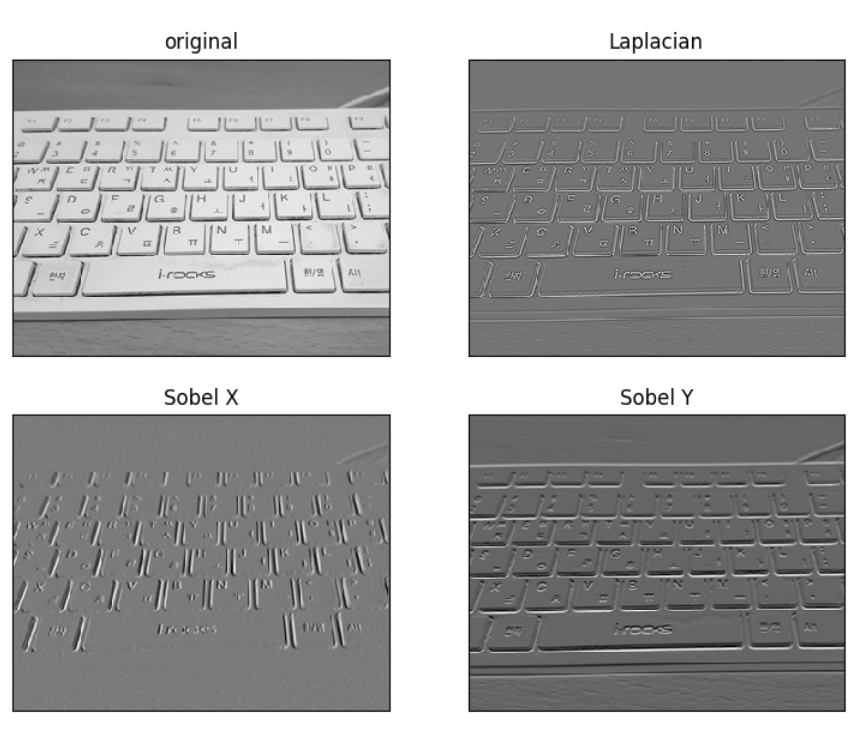
- Laplacian
    - x방향 편미분 결과 + y방향 편미분 결과
    - 원본 이미지의 가로선과 세로선이 모두 나타남
- Sobel
    - SobelX
      - x방향 미분 -> x방향을 따라 값의 변화가 있다면 변화율 감지 -> 세로줄
    - SobelY
      - y방향 미분 -> y방향을 따라 값의 변화가 있다면 변화율 감지 -> 가로줄
- Laplacian과 Sobel은 **이미지의 경계를 찾는데 유용하게 활용**되는데 찾고 싶은 선에 따라 다르게 사용된다.

In [28]:
# Google Drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# pwd move
%cd /content/drive/My Drive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/M3D-VTON/

/content/drive/My Drive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/M3D-VTON


In [16]:
%cd /content/drive/My Drive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/test/

/content/drive/My Drive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/test


In [30]:
!python util/data_preprocessing.py --MPV3D_root mpv3d_example

mpv3d_example
6it [00:06,  1.01s/it]
6it [00:02,  2.54it/s]
clothes pre-alignment done and saved to mpv3d_example/aligned/test_pairs/cloth!
100% 6/6 [00:07<00:00,  1.24s/it]
palms segmentaion done and saved to mpv3d_example/palm-mask!
  0% 0/6 [00:00<?, ?it/s]person_path : mpv3d_example/image/model2_whole_front.png
 17% 1/6 [00:00<00:03,  1.43it/s]person_path : mpv3d_example/image/model3_whole_front.png
 33% 2/6 [00:01<00:02,  1.64it/s]person_path : mpv3d_example/image/model4_whole_front.png
 50% 3/6 [00:01<00:01,  1.59it/s]person_path : mpv3d_example/image/model5_whole_front.png
 67% 4/6 [00:02<00:01,  1.55it/s]person_path : mpv3d_example/image/model6_whole_front.png
 83% 5/6 [00:03<00:00,  1.47it/s]person_path : mpv3d_example/image/model_whole_front.png
100% 6/6 [00:04<00:00,  1.46it/s]
Getting image sobel done and saving to mpv3d_example/image-sobel!
******Data preprocessing done!******


In [18]:
!python test.py --model MTM --name MTM --dataroot mpv3d_example --datalist test_pairs --results_dir resultsdata

----------------- Options ---------------
                add_depth: True                          
            add_grid_loss: False                         
                add_segmt: True                          
           add_theta_loss: False                         
                  add_tps: True                          
             aspect_ratio: 1.0                           
               batch_size: 8                             
          checkpoints_dir: pretrained                    
                 datalist: test_pairs                    
                 datamode: aligned                       
                 dataroot: mpv3d_example                 
          display_winsize: 512                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                grid_size: 3                             
               img_height: 512

## **03. Run Inference** 

### 1) Testing MTM Module

In [1]:
# Google Drive mount
from google.colab import drive
drive.mount('/content/drive')

# pwd move
%cd /content/drive/My Drive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/M3D-VTON/

Mounted at /content/drive
/content/drive/My Drive/[Codestates]AI_bootcamp/Project2/3D-Virtual-Try-On/M3D-VTON


In [32]:
!python test.py --model MTM --name MTM --dataroot mpv3d_example --datalist test_pairs --results_dir resultsdata

----------------- Options ---------------
                add_depth: True                          
            add_grid_loss: False                         
                add_segmt: True                          
           add_theta_loss: False                         
                  add_tps: True                          
             aspect_ratio: 1.0                           
               batch_size: 8                             
          checkpoints_dir: pretrained                    
                 datalist: test_pairs                    
                 datamode: aligned                       
                 dataroot: mpv3d_example                 
          display_winsize: 512                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                grid_size: 3                             
               img_height: 512

In [ ]:
# import matplotlib.pyplot as plt
# plt.figure()
# plt.imshow(to_pil_image(cloth))
# torchvision.utils.save_image(cloth, os.path.join(path, './test.jpg'))

In [ ]:
# (Pdb) data.keys()
# dict_keys(['c_name', 'im_name', 'cloth', 'cloth_mask', 'cloth_sobelx', 'cloth_sobely', 'person', 'person_parse',
#            'person_mask', 'person_shape', 'parse_cloth', 'parse_cloth_mask', 'head_hand_lower', 'imhal_sobelx',
#            'imhal_sobely', 'person_fdepth', 'initial_fdepth', 'person_bdepth', 'initial_bdepth', 'pose', 'agnostic',
#            'grid_image'])
# len(data.keys())

In [ ]:
# opt
# add_depth=True, add_grid_loss=False, add_segmt=True, add_theta_loss=False, add_tps=True, aspect_ratio=1.0, batch_size=1,
# checkpoints_dir='pretrained', datalist='test_pairs', datamode='aligned', dataroot='mpv3d_example', display_winsize=512, epoch='latest',
# eval=False, gpu_ids=[0], grid_size=3, img_height=512, img_width=320, init_gain=0.02, init_type='normal', input_nc_A=29, input_nc_B=3,
# isTrain=False, lambda_depth=1.0, lambda_grid=1.0, lambda_segmt=1.0, lambda_theta=0.1, lambda_warp=1.0, load_iter=0, max_dataset_size=inf,
# model='MTM', n_layers_D=3, n_layers_feat_extract=3, name='MTM', ndf=64, netD='basic', ngf=64, no_pin_memory=False, norm='instance',
# num_test=10000, num_threads=1, phase='test', radius=5, results_dir='results', save_depth_vis=False, save_normal_vis=False,
# save_segmt_vis=False, serial_batches=True, suffix='', use_dropout=False, verbose=False)

### 2) Testing DRM Module

In [6]:
!python test.py --model DRM --name DRM --dataroot mpv3d_example --datalist test_pairs --results_dir results

----------------- Options ---------------
             add_gan_loss: False                         
            add_grad_loss: True                          
          add_normal_loss: False                         
             aspect_ratio: 1.0                           
               batch_size: 8                             
          checkpoints_dir: pretrained                    
                 datalist: test_pairs                    
                 datamode: aligned                       
                 dataroot: mpv3d_example                 
            display_ncols: 2                             
          display_winsize: 512                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
               img_height: 512                           
                img_width: 320                           
                init_gain: 0.0

### 3) Testing TFM Module

In [ ]:
!python test.py --model TFM --name TFM --dataroot mpv3d_example --datalist test_pairs --results_dir results

## 04.Getting colored point cloud and Remeshing

In [ ]:
!python rgbd2pcd.py